#Introducción

La diabetes es una "una enfermedad crónica (de larga duración) que afecta la forma en que el cuerpo convierte los alimentos en energía." [(Centros para el Control y la Prevención de Enfermedades)](https://www.cdc.gov/diabetes/spanish/basics/diabetes.html)
Según la Organización Mundial de la Salud, cerca de 422 millones de personas han desarrollado diabetes. Esto supone una carga para el sistema de salud especialmente en países de ingresos medios a bajos. Por ello es importante contar con herramientas que puedan anticipar el desarrollo de diabetes para tomar medidas preventivas.

Así, el principal objetivo de este trabajo es la construcción de un modelo de machine learning que permita predecir la probabilidad de que una persona desarrolle prediabetes o diabetes. Además, se pretende llevar a cabo la productivización del modelo mediante la creación de una aplicación web. Esta aplicación facilitará a los usuarios la evaluación de su riesgo de desarrollar esta condición mediante la introducción de información médica, de estilo de vida y demográfica.


####Presentación de datos
Para el presente trabajo, se utilizó el conjunto de datos ["Diabetes Health Indicators Dataset"](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/) consolidado por Alex Teboul. Este conjunto de datos se basa en la encuesta de 2015 ["Behavioral Risk Factor Surveillance System"](https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system) realizada por el Centers for Disease Control and Prevention, la agencia nacional de salud pública de Estados Unidos y contiene información sobre factores de riesgo asociados a la diabetes.<br>
El conjunto consta de 70692 observaciones y 22 variables.


#### Diccionario de datos

A continuación, se presentan las variables contenidas en el conjunto de datos, asi como sus respectivas definiciones y tipos de datos. Siendo **“Diabetes_binary”** la variable objetivo binaria.

| Variable | Explicación | Valores | Tipo|
|---------|-------------|--------------|--------------|
| **Diabetes_binary** | Presencia o ausencia de diabetes/prediabetes | 0 = No diabetes<br> 1 = Prediabetes y/o diabetes | Cualitativa categórica |
| HighBP | Adultos a quienes se les ha informado que tienen presión arterial alta por un médico, enfermera u otro profesional de la salud | 0 = no presión aterial alta<br>1 = presión arterial alta | Cualitativa categórica |
| HighChol | ¿Alguna vez un médico, enfermero u otro profesional de la salud le ha informado que su colesterol en la sangre está alto? | 0 = no colesterol alto<br>1 = colesterol alto | Cualitativa categórica|
| CholCheck | Evaluación del colesterol en los últimos cinco años | 0 = no se ha revisado el colesterol en los últimos 5 años<br>1 = sí se ha revisado el colesterol en los últimos 5 años | Cualitativa categórica|
| BMI | Índice de Masa Corporal  | BMI > = 1<br>Rango 1 - 9999 | Cuantitativa continua |
| Smoker | ¿Ha fumado al menos 100 cigarrillos en toda su vida? [Nota: 5 paquetes = 100 cigarrillos]  | 0 = no<br>1 = sí | Cualitativa categórica |
| Stroke | (Alguna vez le dijeron) que tuvo un derrame cerebral | 0 = no<br>1 = sí | Cualitativa categórica |
| HeartDiseaseorAttack | Enfermedad coronaria (CHD) o infarto de miocardio (MI) | 0 = no<br>1 = sí | Cualitativa categórica |
| PhysActivity | Actividad física en los últimos 30 días, excluyendo el trabajo | 0 = no<br>1 = sí | Cualitativa categórica |
| Fruits | Consume frutas 1 o más veces al día | 0 = no<br>1 = sí | Cualitativa categórica |
| Veggies | Consume verduras 1 o más veces al día | 0 = no<br>1 = sí | Cualitativa categórica |
| HvyAlcoholConsump | Personas que consumen alcohol en exceso (hombres adultos que tienen más de 14 bebidas por semana y mujeres adultas que tienen más de 7 bebidas por semana) | 0 = no<br>1 = sí | Cualitativa categórica |
| AnyHealthcare | Tiene algún tipo de cobertura de atención médica, incluyendo seguro de salud, planes prepagos como HMO, etc. | 0 = no<br>1 = sí | Cualitativa categórica |
| NoDocbcCost | ¿Hubo algún momento en los últimos 12 meses en que necesitó ver a un médico pero no pudo debido al costo? | 0 = no<br>1 = sí | Cualitativa categórica |
| GenHlth | ¿Diría que en general su salud es: escala de 1 a 5 | 1 = excelente<br>2 = muy buena<br>3 = buena<br>4 = regular<br>5 = mala | Cualitativa categórica |
| MentHlth | Pensando en su salud mental, que incluye estrés, depresión y problemas emocionales, ¿durante cuántos días de los últimos 30 su salud mental no fue buena?  | Escala de 0 - 30 días | Cuantitativa discreta |
| PhysHlth | Pensando en su salud física, que incluye enfermedades y lesiones físicas, ¿durante cuántos días de los últimos 30 su salud física no fue buena?  | Escala de 0 - 30 días | Cuantitativa discreta |
| DiffWalk | ¿Tiene dificultades graves para caminar o subir escaleras?  | 0 = no<br>1 = sí | Cualitativa categórica |
| Sex | Sexo | 0 = mujer<br>1 = hombre | Cualitativa categórica |
| Age | Categoría de edad de 13 niveles | 1 = 18-24<br>2 = 25-29<br>3 = 30-34<br>4 = 35-39<br>5 = 40-44<br>6 = 45-49<br>7 = 50-54<br>8 = 55-59<br>9 = 60-64<br>10 = 65-69<br>11 = 70-74<br>12 = 75-79<br>13 = 80 a más | Cualitativa categórica |
| Education| Nivel educativo, escala de 1 a 6 | 1 = Nunca asistió a la escuela o solo jardín de infantes<br>2 = Grados 1 al 8 (Primaria)<br>3 = Grados 9 al 11 (Algunos años de secundaria)<br>4 = Grado 12 o GED (Graduado de secundaria)<br>5 = Universidad 1 a 3 años (Algunos años de universidad o escuela técnica)<br>6 = Universidad 4 años o más (Graduado universitario) | Cualitativa categórica |
| Income | Ingresos anuales, escala de 1 a 8 | 1 = Menos de \$10,000<br>2 = Menos de \$15,000<br>3 = Menos de \$20,000<br>4 = Menos de \$25,000<br>5 = Menos de \$35,000<br>6 = Menos de \$50,000<br>7 = Menos de \$75,000<br>8 = $75,000 o más | Cualitativa categórica |


####Importar librerías


In [1]:
%%capture
!pip install scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from pickle import dump, load

""" Semilla """

seed = 77

####Cargar datos



In [2]:
archivo = "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
data = pd.read_csv(archivo)
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


#Evaluación de variables

##¿Cómo está compuesto el conjunto de datos?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

&#10148; Compuesto de 70692 observaciones y 22 columnas.</br>
&#10148; No hay presencia de valores nulos en ninguna de las 22 variables.</br>
&#10148; Se observa que algunos tipos de datos asociados a ciertas variables son incorrectos y requieren ajustes. </br>



Procedemos a cambiar el tipo de dato de las variables. Así:

In [4]:
#Creamos una lista para las variables numéricas
var_int = ['MentHlth', 'PhysHlth']
data[var_int] = data[var_int].astype("int")

In [5]:
#Creamos una lista para las variables categóricas
var_cat = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
data[var_cat] = data[var_cat].astype("category")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Diabetes_binary       70692 non-null  category
 1   HighBP                70692 non-null  category
 2   HighChol              70692 non-null  category
 3   CholCheck             70692 non-null  category
 4   BMI                   70692 non-null  float64 
 5   Smoker                70692 non-null  category
 6   Stroke                70692 non-null  category
 7   HeartDiseaseorAttack  70692 non-null  category
 8   PhysActivity          70692 non-null  category
 9   Fruits                70692 non-null  category
 10  Veggies               70692 non-null  category
 11  HvyAlcoholConsump     70692 non-null  category
 12  AnyHealthcare         70692 non-null  category
 13  NoDocbcCost           70692 non-null  category
 14  GenHlth               70692 non-null  category
 15  Me

Número de observaciones para la variable objetivo

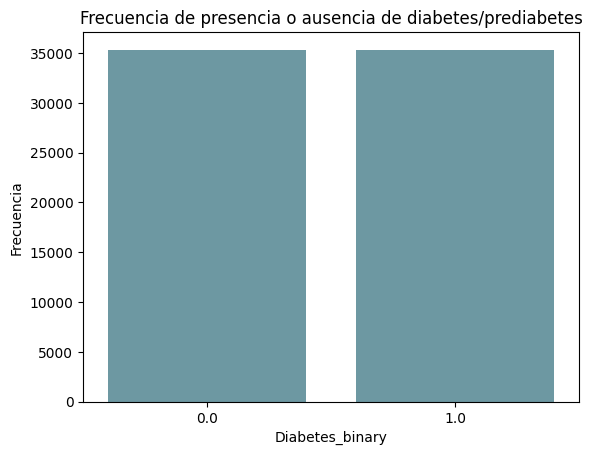

In [7]:
color = '#649EAB'
diabetes_b = data["Diabetes_binary"].value_counts()
sns.barplot(x=diabetes_b.index, y=diabetes_b.values, color = color)
plt.title('Frecuencia de presencia o ausencia de diabetes/prediabetes')
plt.xlabel('Diabetes_binary')
plt.ylabel('Frecuencia')
plt.show()

El conjunto de datos está balanceado.

#Análisis Exploratorio de Datos (EDA)

##Análisis Univariado

##Variables cuantitativas

In [8]:
""" Función para calcular estadísticas descriptivas para las variables cuantitativas
    x: Nombre de la variable (escribirla con comillas)
    var_list: lista que incluye todas las variables del conjunto de datos
    """

def quant_var_stats(x):
    #Definimos el tipo de variable
    var_list = data.columns
    if x in var_list:
        if data[x].dtype == 'object':
            print ('\033[1m' + 'Variable Cualitativa (Categórica)' + '\033[0m')
        elif data[x].dtype == 'int64':
            print ('\033[1m' + 'Variable Cuantitativa Discreta' + '\033[0m')
        elif data[x].dtype == 'float64':
            print ('\033[1m' + 'Variable Cuantitativa Continua' + '\033[0m')

    #Calculamos la media, mediana y moda
    mean=data[x].mean()
    median=data[x].median()
    mode=data[x].mode()
    print ('\033[1m' + '\nMedidas de Tendencia Central' + '\033[0m')
    print('Media: ',mean,'\nMediana: ',median,'\nModa: ',mode)

    #Calculamos el Max, Min, Primer cuartil, Tercer cuartil
    max=data[x].max()
    min=data[x].min()
    First_quartile=data[x].quantile(0.25)
    Third_quartile=data[x].quantile(0.75)
    IQR=Third_quartile-First_quartile
    print ('\033[1m' + '\nMedidas de Posición' + '\033[0m')
    print('Mínimo: ',min,'\nMáximo: ',max,'\nWhisker Inferior:',First_quartile-1.5*IQR,'\n1er Cuartil: ',First_quartile,'\n3er Cuartil: ',Third_quartile,'\nWhisker Superior:',Third_quartile+1.5*IQR)

    #Calculamos medidas de dispersión
    STD=data[x].std()
    print ('\033[1m' + '\nMedidas de variabilidad' + '\033[0m')
    print('Rango: ',max-min,'\nIQR: ',IQR,'\nDesviación estándar: ',STD)

In [9]:
 """Función para generar boxplot e histograma
    feature: dataframe con las columnas a plotear
    figsize: tamaño de la figura
    bins: número de bins
    """
def histogram_boxplot(feature, figsize=(18, 10), bins=None):
    num_cols = feature.shape[1]

    f, axes = plt.subplots(nrows=2, ncols=num_cols, sharex='col',
                           gridspec_kw={"height_ratios": (.25, .75)},
                           figsize=figsize)

    for i, col in enumerate(feature.columns):
        sns.boxplot(feature[col], ax=axes[0, i], showmeans=True, color= color, medianprops={'color':'orange'}, boxprops=dict(facecolor='lightblue', linewidth=2), whiskerprops=dict(color='green'))
        sns.histplot(feature[col], ax=axes[1, i], bins=bins, kde=True, color= color) if bins else sns.histplot(feature[col], kde=True, ax=axes[1, i], color='lightcoral')
        axes[1, i].axvline(np.mean(feature[col]), color='green', linestyle='--')
        axes[1, i].axvline(np.median(feature[col]), color='black', linestyle='-')
        axes[1, i].legend({"Promedio": np.mean(feature[col]), "Mediana": np.median(feature[col])})

    plt.tight_layout()
    plt.show()

In [10]:
quant_var_stats('MentHlth')

Variable Cuantitativa Discreta

Medidas de Tendencia Central
Media:  3.7520370056017653 
Mediana:  0.0 
Moda:  0    0
Name: MentHlth, dtype: int64

Medidas de Posición
Mínimo:  0 
Máximo:  30 
Whisker Inferior: -3.0 
1er Cuartil:  0.0 
3er Cuartil:  2.0 
Whisker Superior: 5.0

Medidas de variabilidad
Rango:  30 
IQR:  2.0 
Desviación estándar:  8.155626553608068


In [11]:
quant_var_stats('PhysHlth')

Variable Cuantitativa Discreta

Medidas de Tendencia Central
Media:  5.810417020313473 
Mediana:  0.0 
Moda:  0    0
Name: PhysHlth, dtype: int64

Medidas de Posición
Mínimo:  0 
Máximo:  30 
Whisker Inferior: -9.0 
1er Cuartil:  0.0 
3er Cuartil:  6.0 
Whisker Superior: 15.0

Medidas de variabilidad
Rango:  30 
IQR:  6.0 
Desviación estándar:  10.06226053116389


In [12]:
quant_var_stats('BMI')

Variable Cuantitativa Continua

Medidas de Tendencia Central
Media:  29.856985231709388 
Mediana:  29.0 
Moda:  0    27.0
Name: BMI, dtype: float64

Medidas de Posición
Mínimo:  12.0 
Máximo:  98.0 
Whisker Inferior: 13.0 
1er Cuartil:  25.0 
3er Cuartil:  33.0 
Whisker Superior: 45.0

Medidas de variabilidad
Rango:  86.0 
IQR:  8.0 
Desviación estándar:  7.1139538515768415


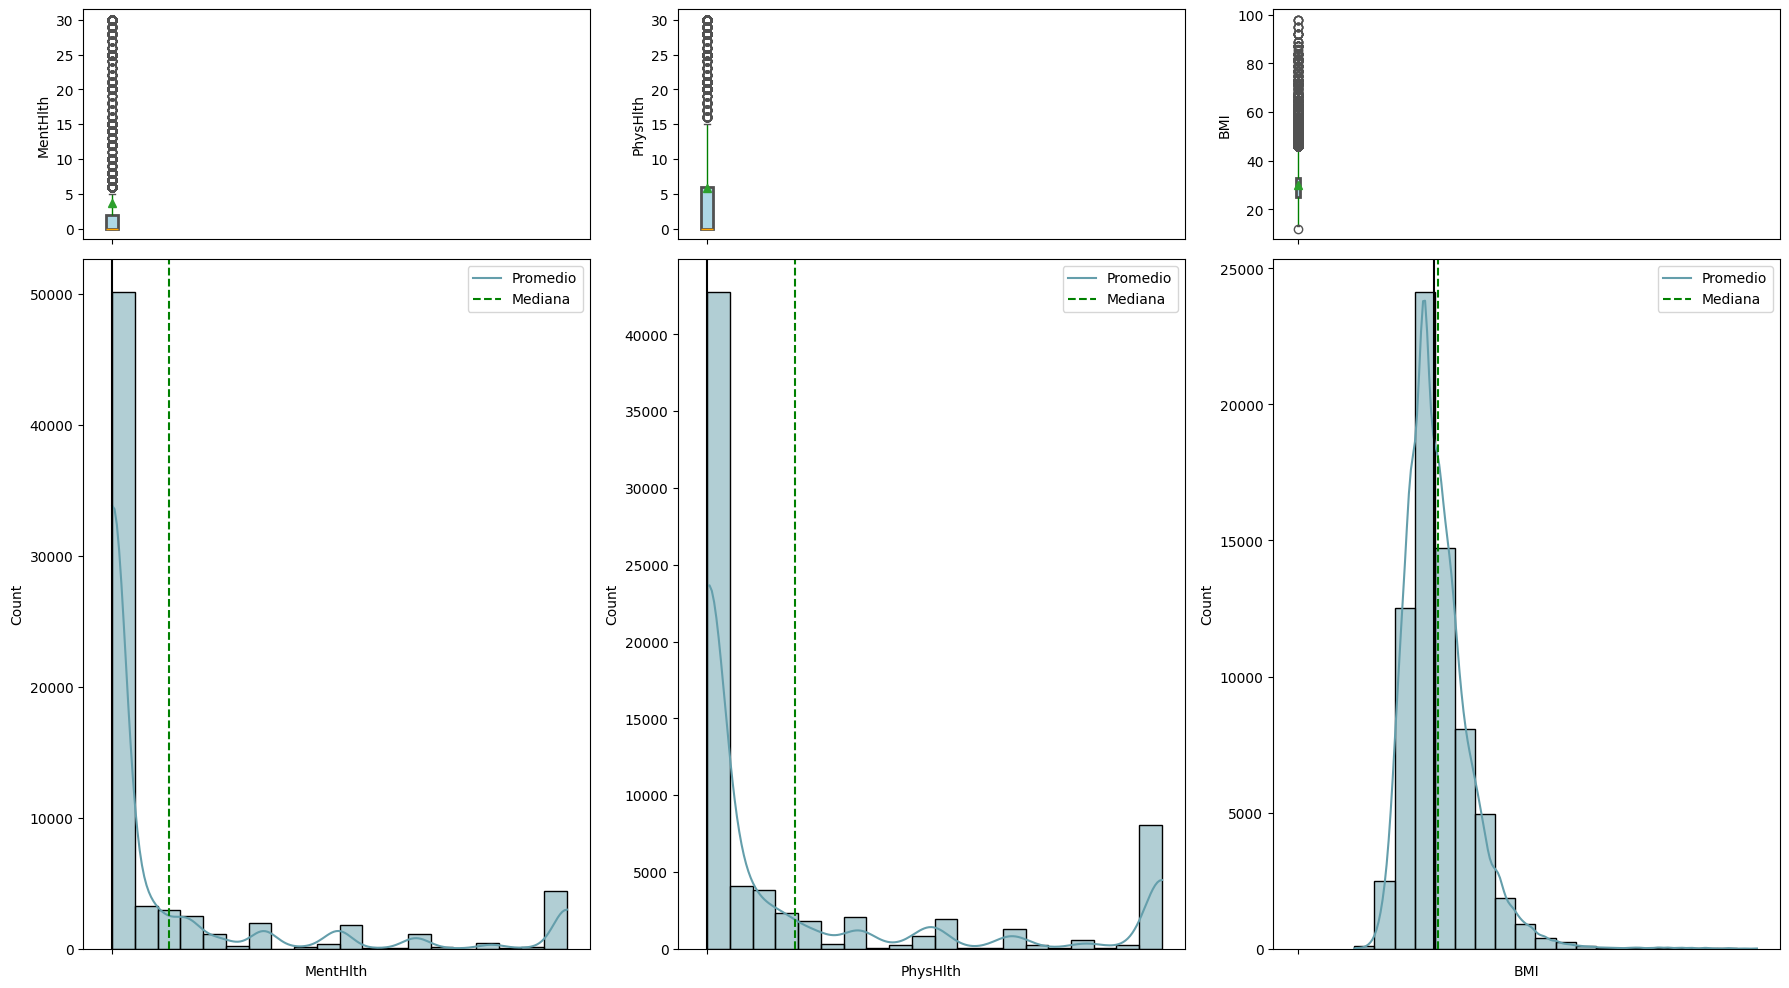

In [13]:
cols = ['MentHlth', 'PhysHlth', 'BMI']
subset_data = data[cols]

histogram_boxplot(subset_data, bins=20)


&#10148; Se observan valores atípicos para estas tres variables. Sin embargo, teniendo en cuenta que los valores de "MentHlth" y "PhysHlth" siguen una escala que va del 0 al 30, no se tratarán esos valores atípicos.<br>

En el caso de "BMI", se observan valores atípicos que parecen ser errores en la entrada de datos. Se han registrado valores de "BMI" mayores a 54, lo cual parece inconsistente. Según la [National Heart, Lung, and Blood Institute (NIH)](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl2.htm), los valores de BMI mayores a 35 generalmente llegan hasta 54. Basándonos en esa información estos valores atípicos deben ser tratados. <br>

Podemos decir además que para la variable:

&#10148; "MentHlth": Más de la mitad de los encuestados reportaron pocos días en los que sintieron que su salud mental no fue buena.</br>
&#10148; "PhysHlth": Más de la mitad de los encuestados reportaron pocos días en los que sintieron que su salud física no fue buena. </br>
&#10148; "BMI": La mayor proporción de los encuestados presentan un BMI menor o igual a 29 lo que los coloca en el rango de peso "normal" y "sobrepeso".</br>


##Variables cualitativas

In [14]:
def perc_on_bar(feature):
    #Creamos el countplot
    sns.set(rc={'figure.figsize': (18, 5)})  #Ajustamos el ancho y alto
    ax = sns.countplot(x=feature, data=data, palette=['#649EAB'])

    total = len(data)
    for p in ax.patches:
        count = int(p.get_height())  #Recuento de obs. para las categorias
        percentage = '{:.1f}%'.format(100 * count / total)  #Porcentaje de cada clase por categoría
        x = p.get_x() + p.get_width() / 2 - 0.1  #ancho
        y = p.get_y() + p.get_height()  #alto
        ax.annotate(f'{count}\n{percentage}', (x, y), ha='center', va='center', size=12)  #Recuento y porcentaje

    plt.show()

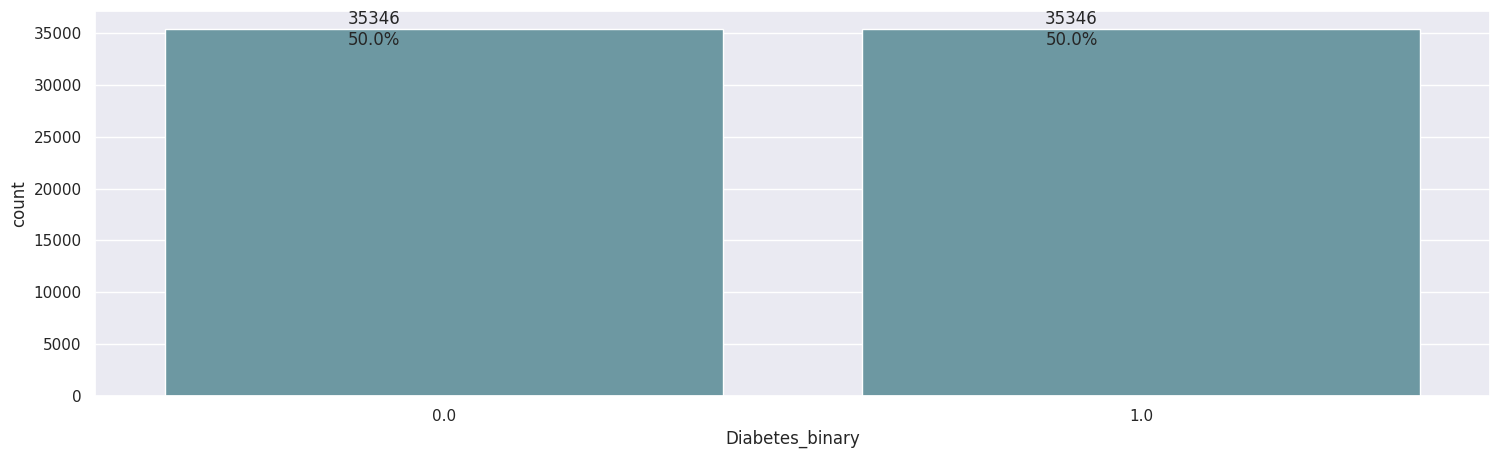

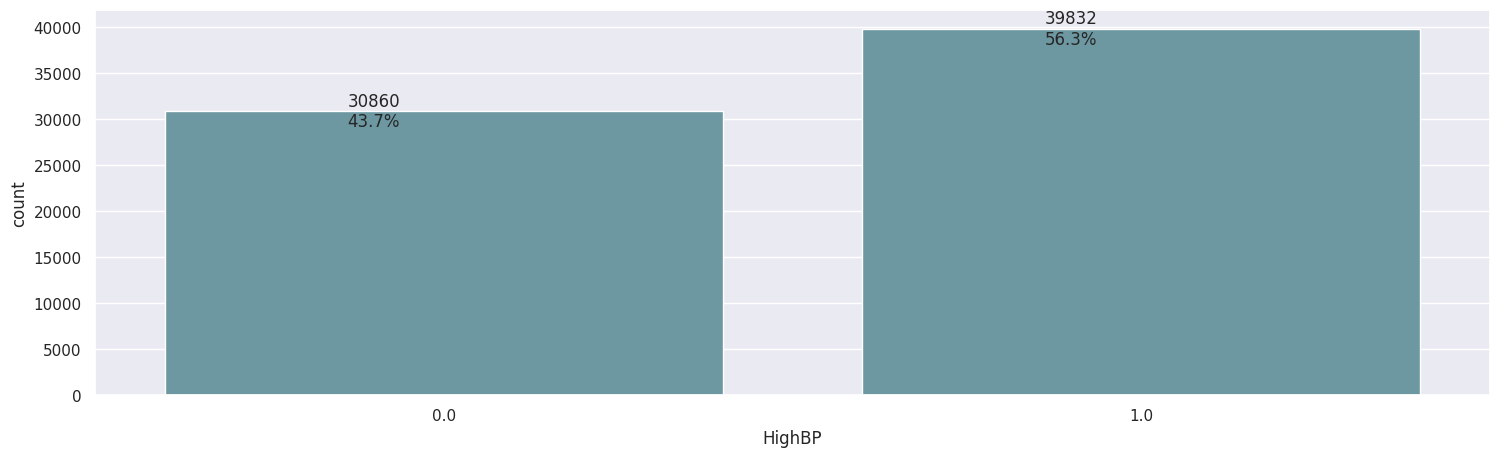

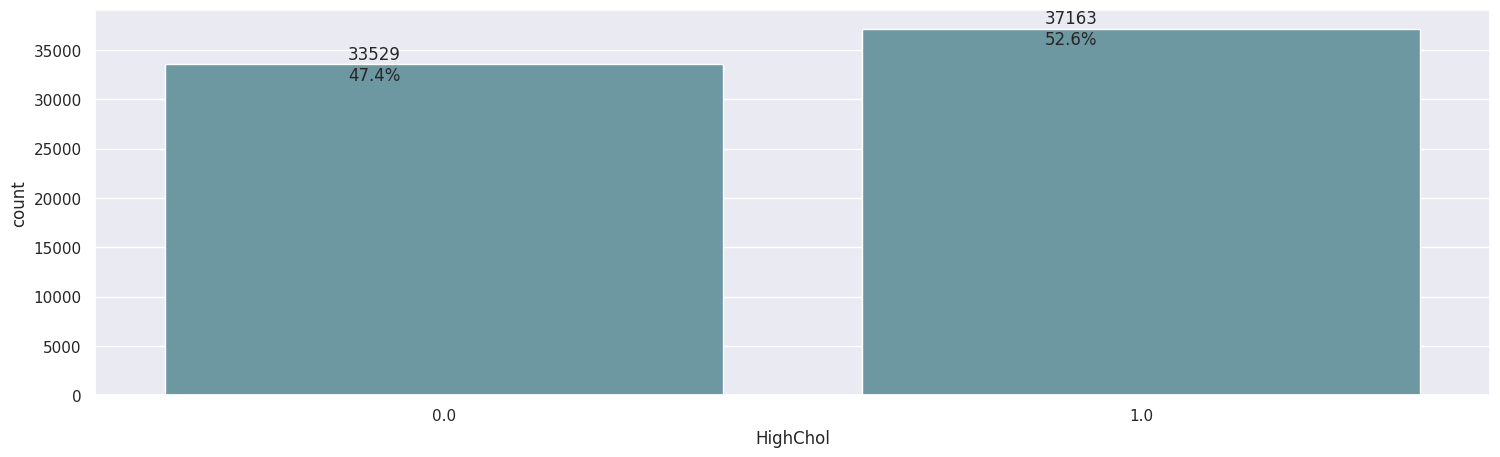

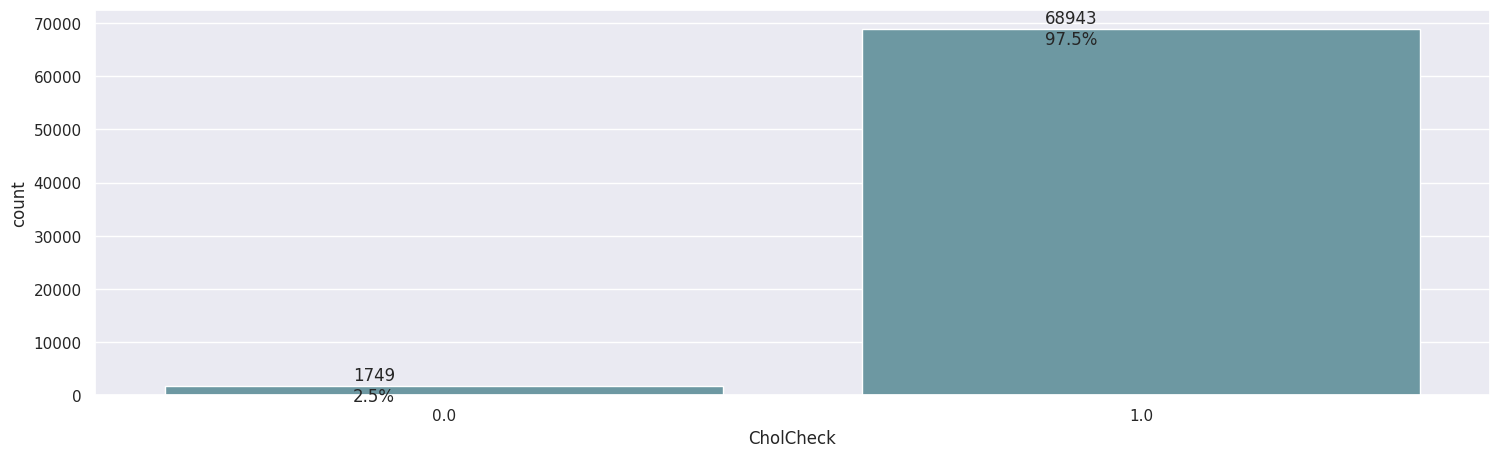

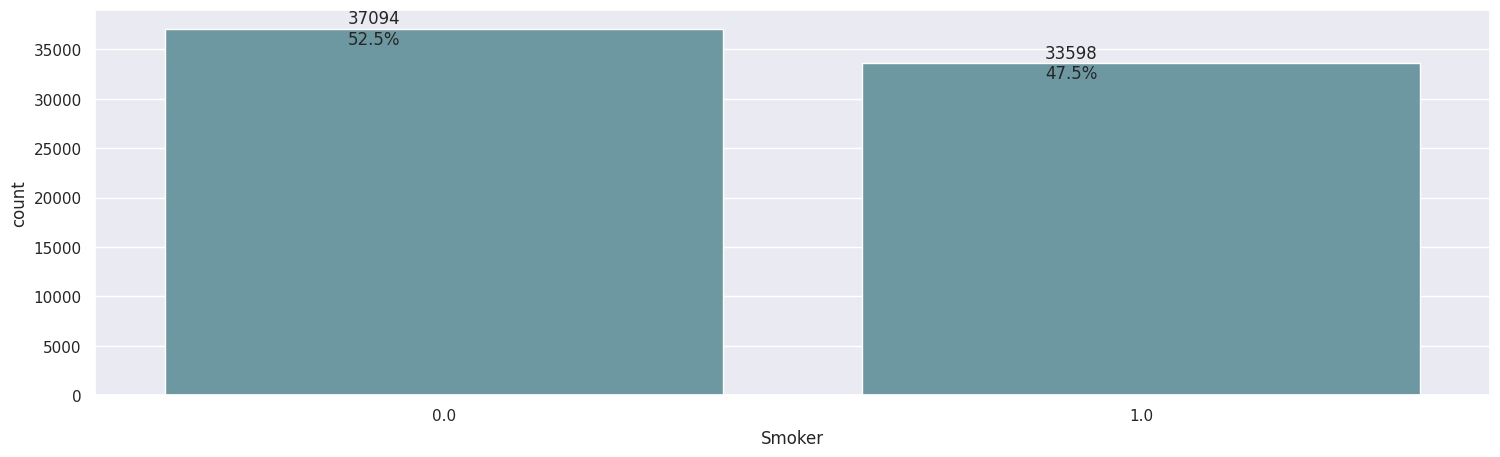

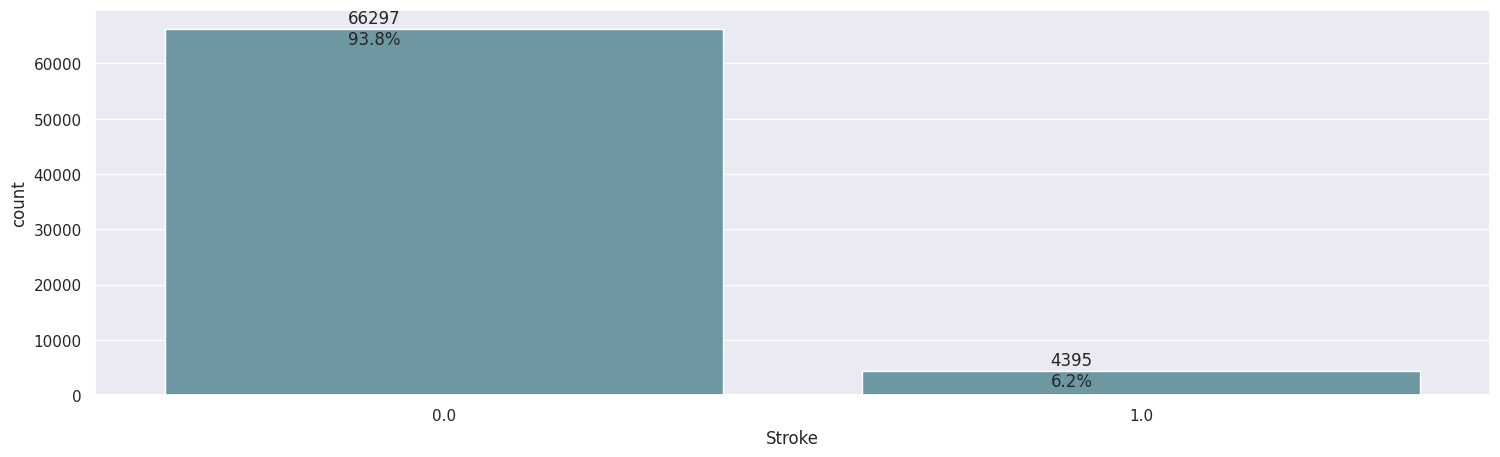

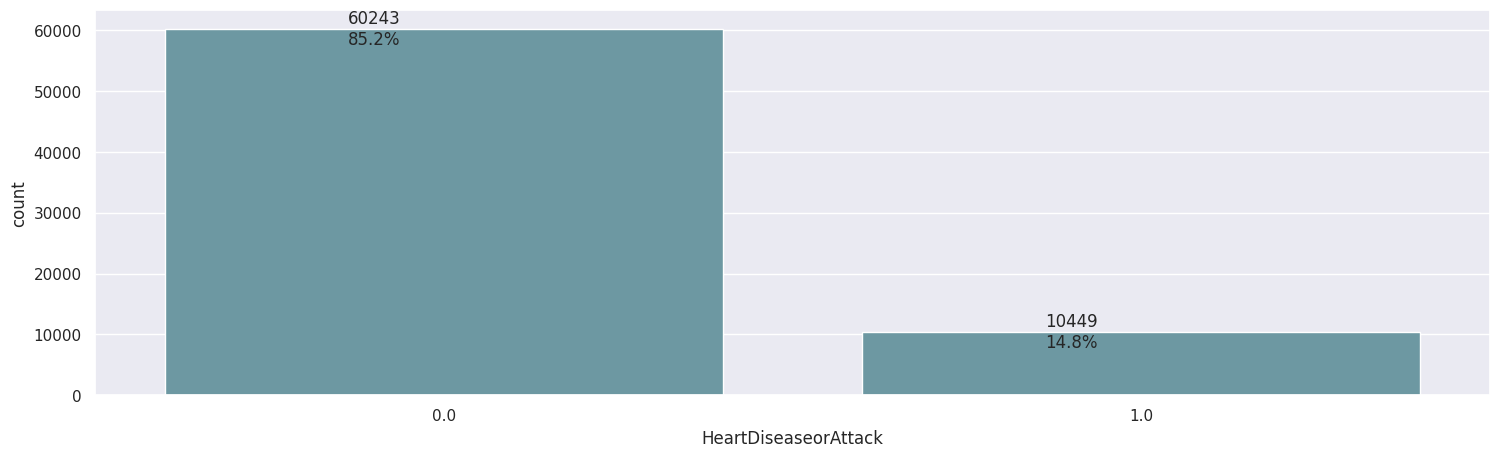

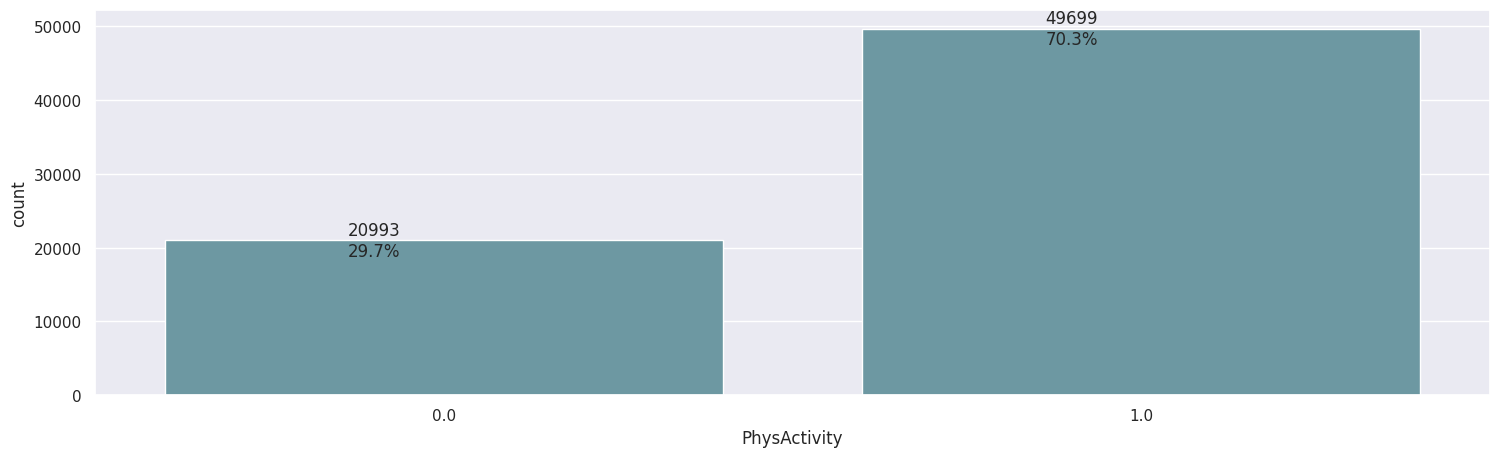

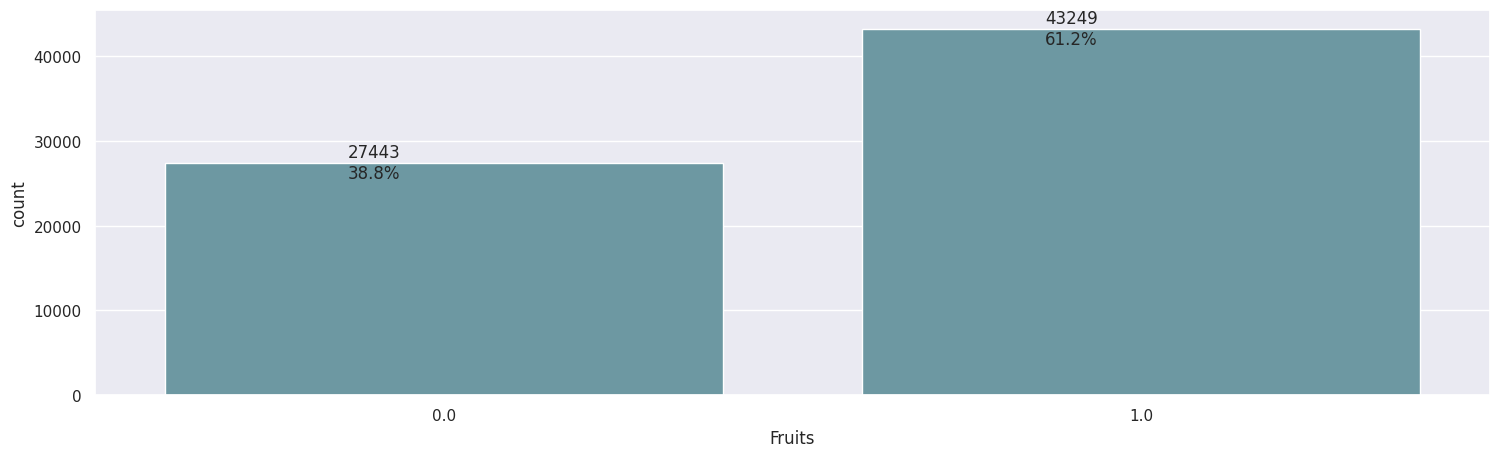

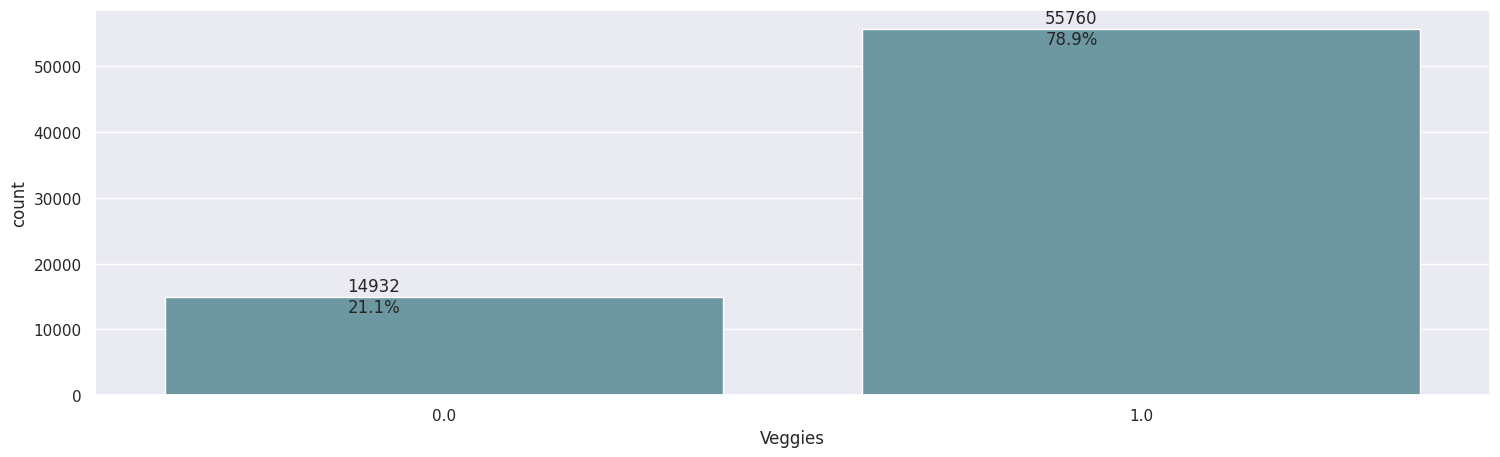

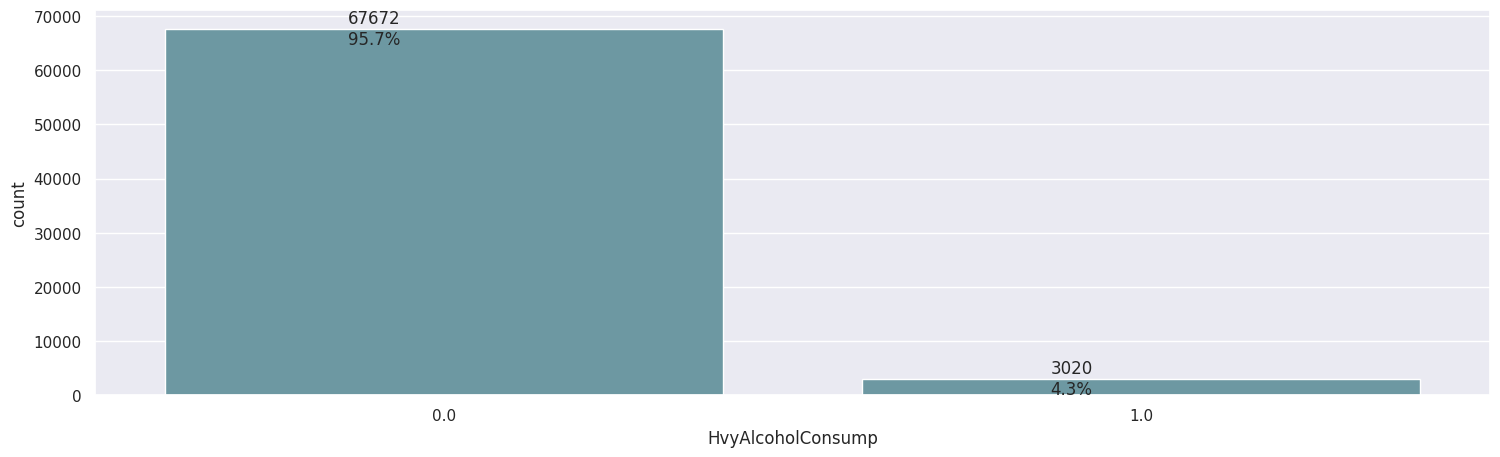

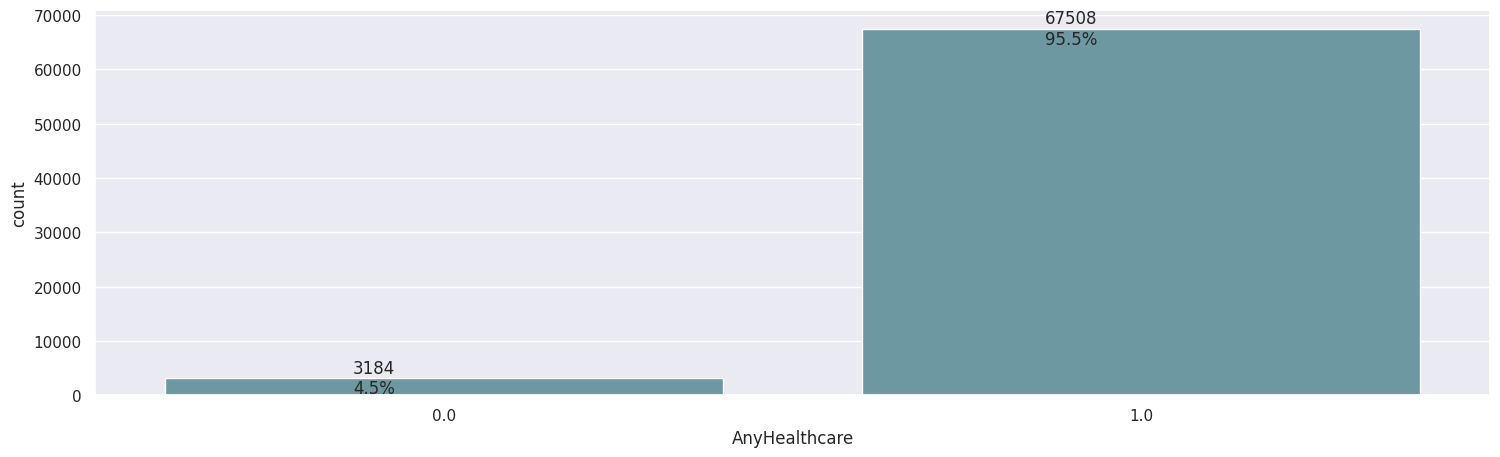

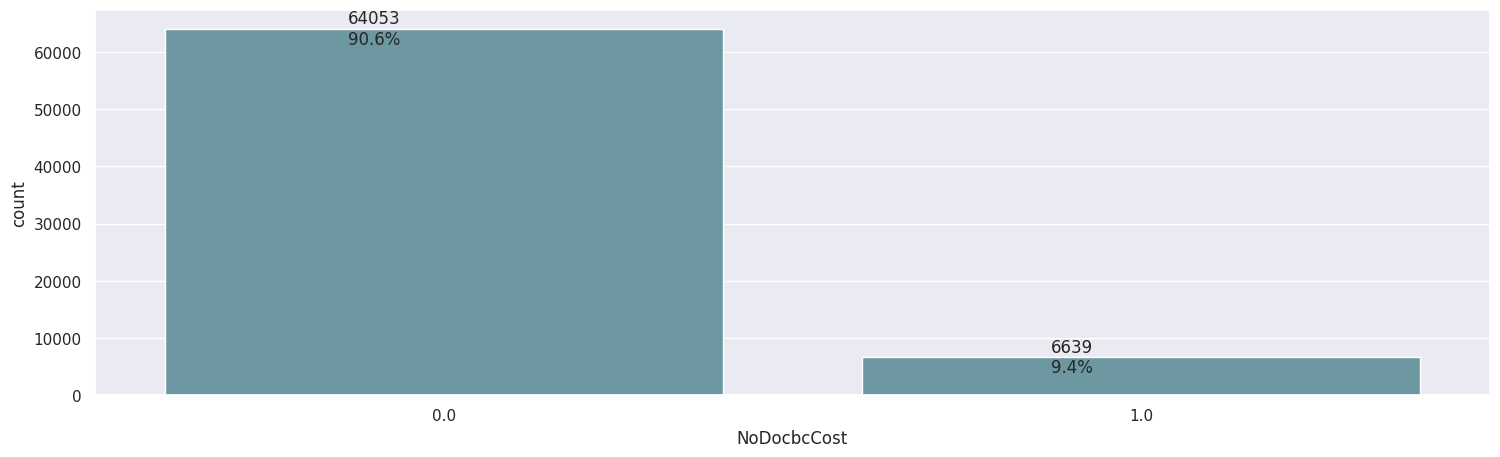

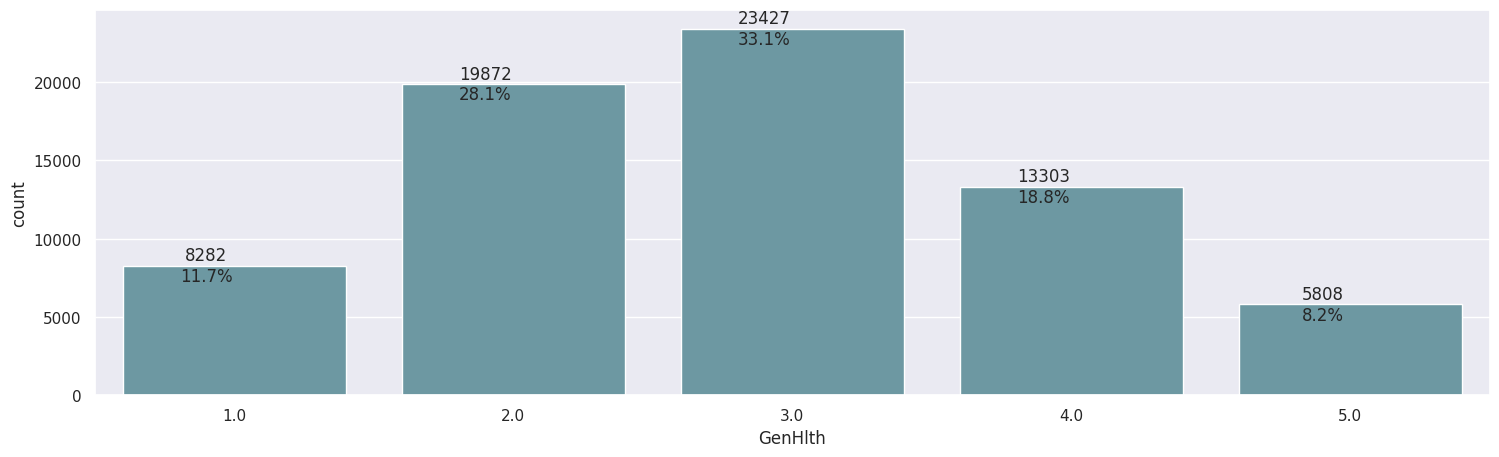

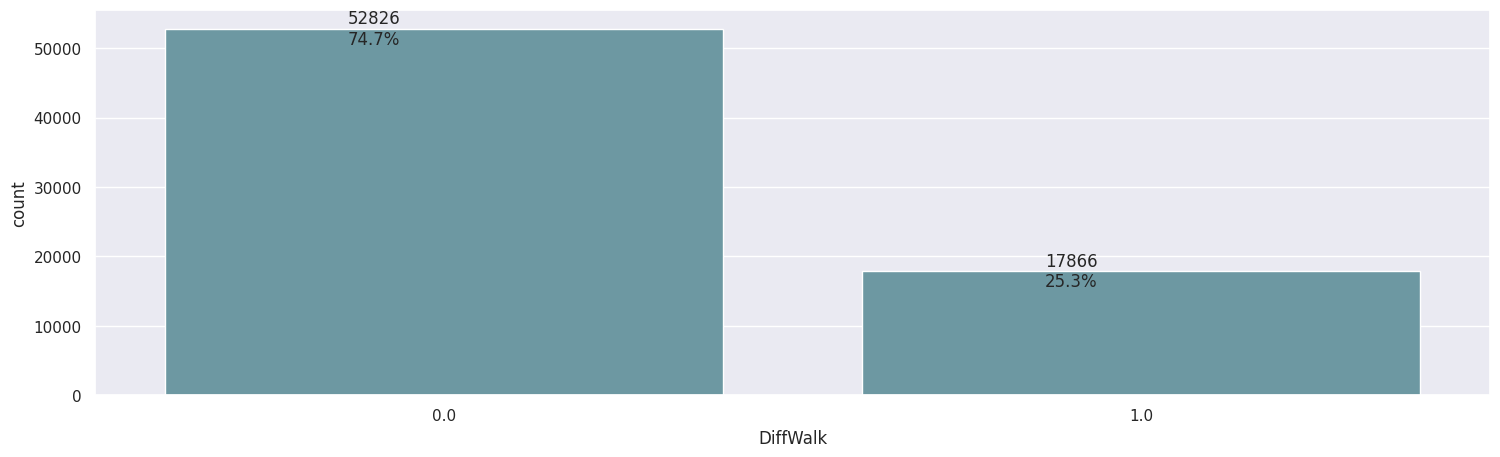

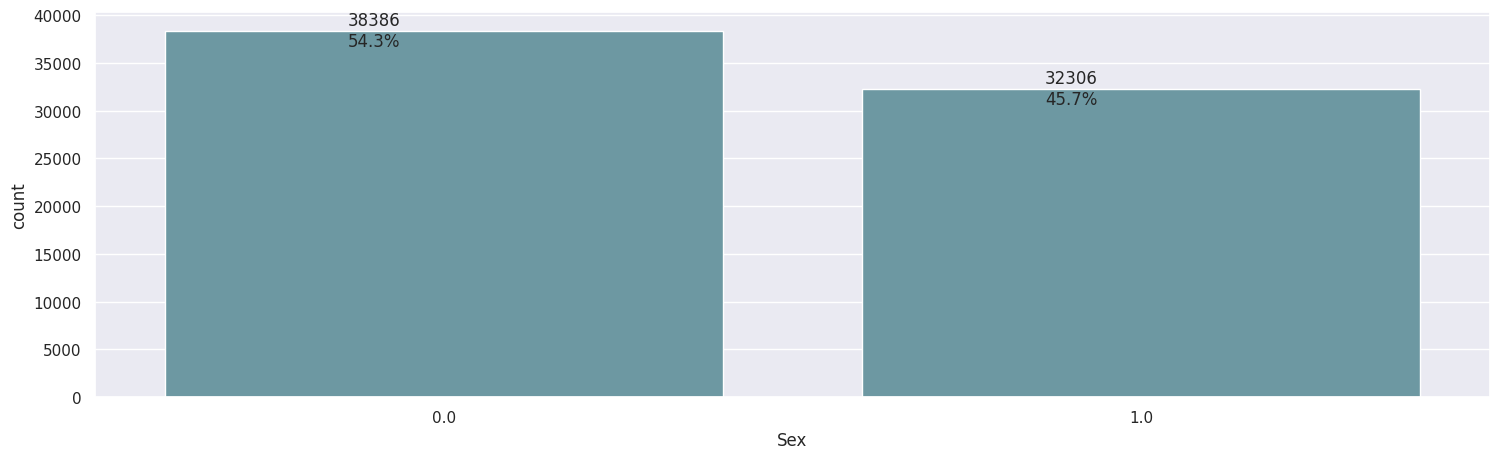

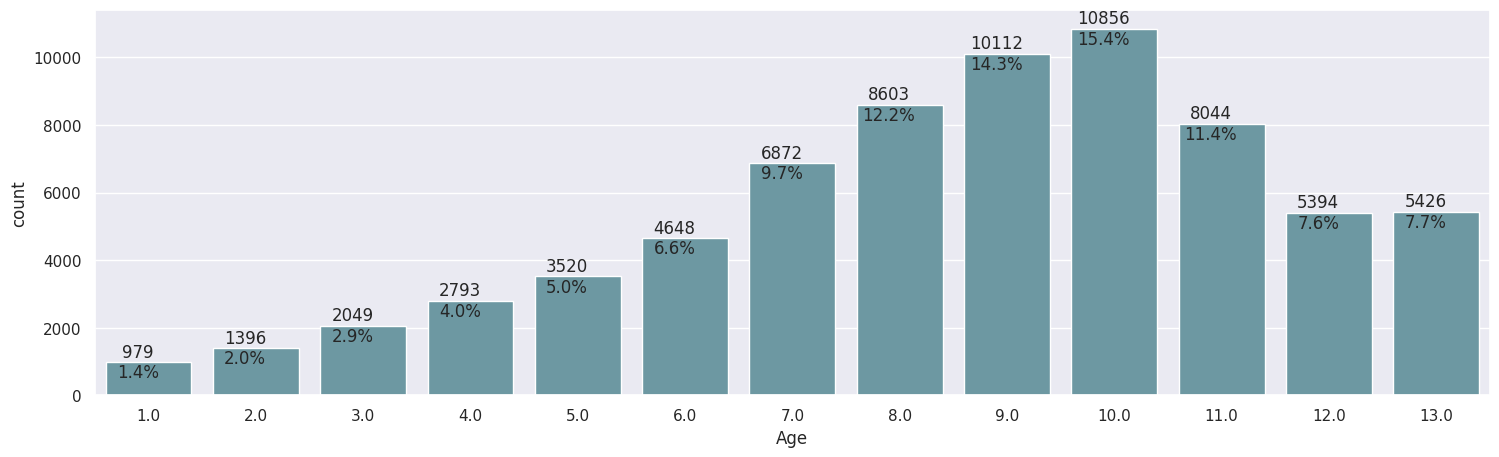

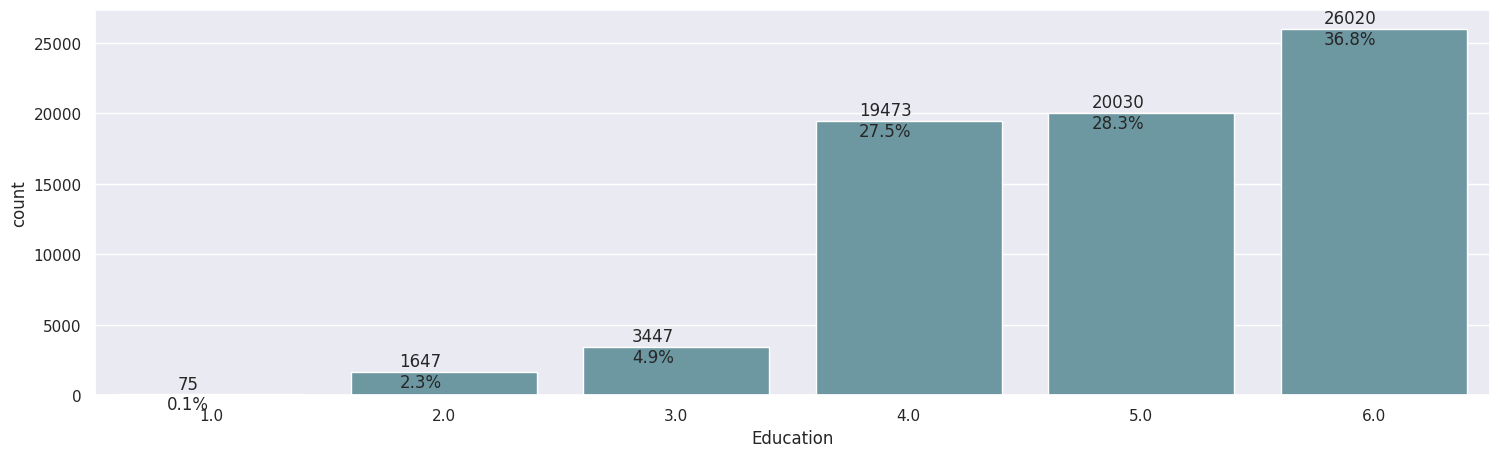

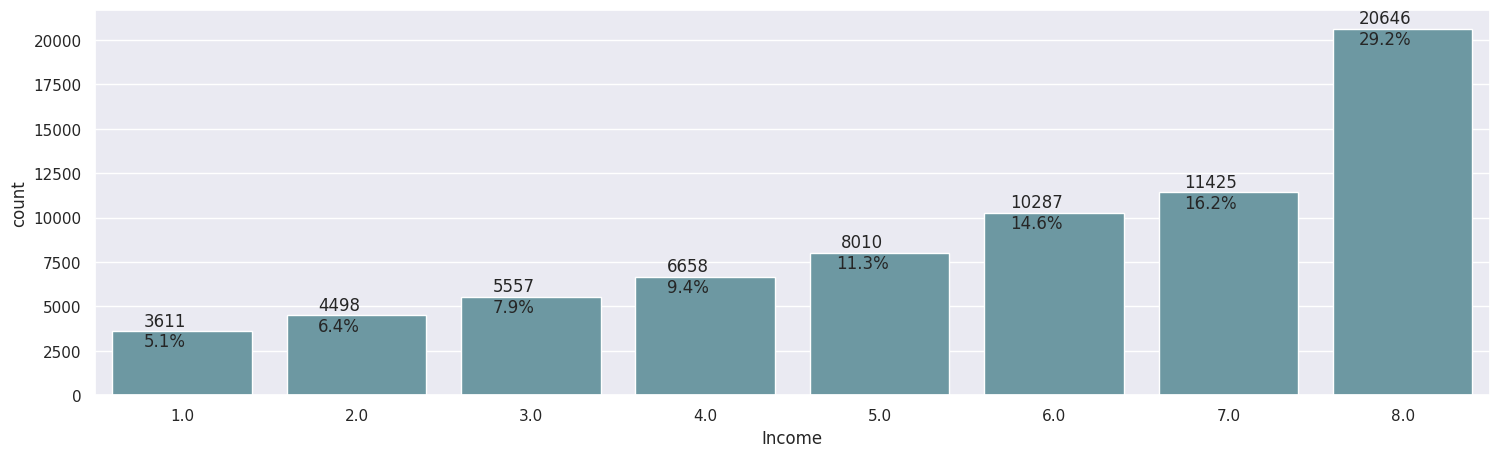

In [15]:
var_cat = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
           'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
           'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Generar gráficos para cada variable en var_cat
for variable in var_cat:
    perc_on_bar(variable)

Del análisis de las variables cualitativas se desprenden las siguientes características:


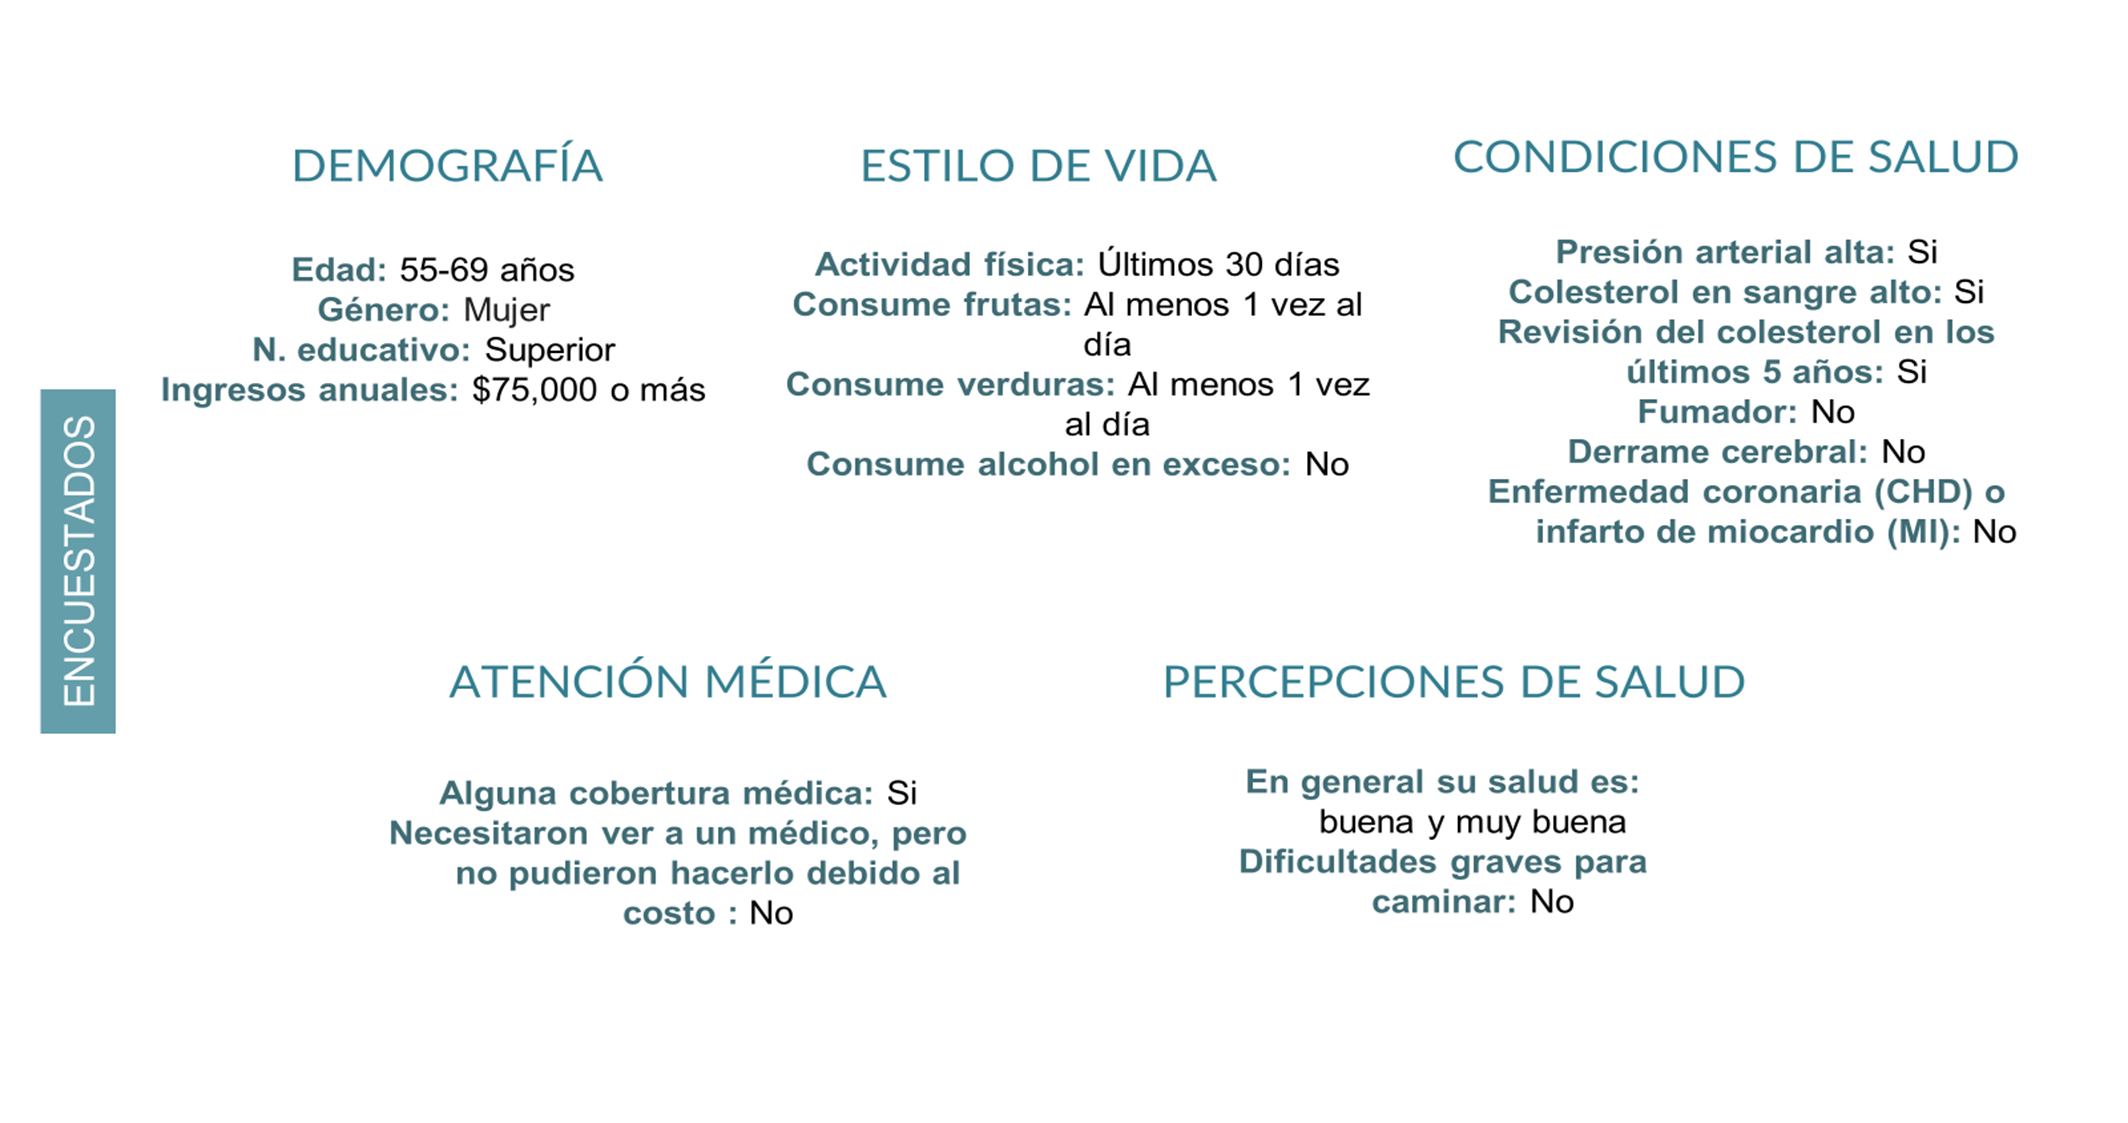

##Análisis Bivariante

##Correlación entre variables cuantitativas

In [16]:
correlation = data.corr()
correlation

,BMI,MentHlth,PhysHlth
BMI,1.000000,0.104682,0.161862
MentHlth,0.104682,1.000000,0.380272
PhysHlth,0.161862,0.380272,1.000000


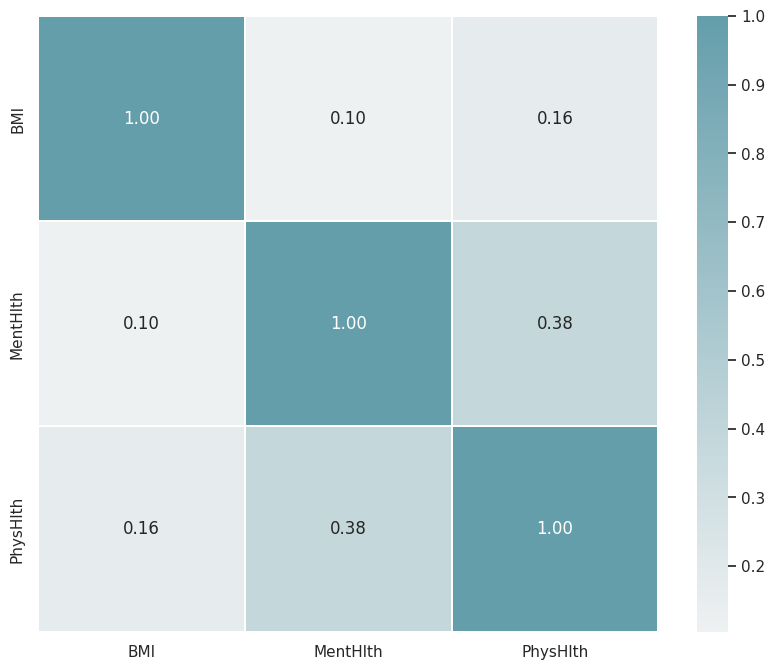

In [17]:
color = '#649EAB'
cmap = sns.light_palette(color, as_cmap=True)
fig,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap=cmap)
plt.show()

&#10148; Se observan correlaciones débiles entre las variables cuantitativas.

Procederemos a observar la relación entre nuestra variable objetivo vs las variables cuantitativas para obtener mayores insights.

In [18]:
cols1 = ['Diabetes_binary','MentHlth', 'PhysHlth', 'BMI']
subset_data1 = data[cols1]
subset_data1.groupby(by='Diabetes_binary').agg('mean')[['MentHlth', 'PhysHlth', 'BMI']]

,MentHlth,PhysHlth,BMI
Diabetes_binary,,,
0.0,3.042268,3.666355,27.769960
1.0,4.461806,7.954479,31.944011


&#10148; Las personas que presentan diabetes/prediabetes reportan más días en los que su salud mental no fue buena.<br>
&#10148; Las personas que presentan diabetes/prediabetes reportan más días en los que su salud física no fue buena. <br>
&#10148; En promedio, las personas que presentan diabetes/prediabetes presentan un BMI más alto.<br>

##Variables cualitativas

A continuación, veremos si existe relación entre la variable target y las variables cualitativas.

In [19]:
color = '#649EAB'
paleta = sns.color_palette([color, sns.light_palette(color)[2], sns.dark_palette(color)[2]])

In [20]:
def grouped_bar_plot(x, flag=True):
    #sns.set(palette='nipy_spectral')

    #Tabla de frecuencia
    tab1 = pd.crosstab(x, data['Diabetes_binary'], margins=True)

    if flag:
        print(tab1)
        print('-' * 120)

    #Gráfico de barras agrupadas
    ax = tab1.iloc[:-1, :-1].plot(kind='bar', stacked=False, figsize=(12, 6), color=paleta)

    #Añadimos etiquetas y leyenda
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel(x.name)
    plt.title('Diabetes_binary y {}'.format(x.name))
    plt.legend(title='Diabetes_binary')

    #Añadimos porcentajes en las barras
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:}', (x + width / 2, y + height / 2), ha='center', va='center')

    plt.show()

Diabetes_binary vs HighBP

Diabetes_binary    0.0    1.0    All
HighBP                              
0.0              22118   8742  30860
1.0              13228  26604  39832
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


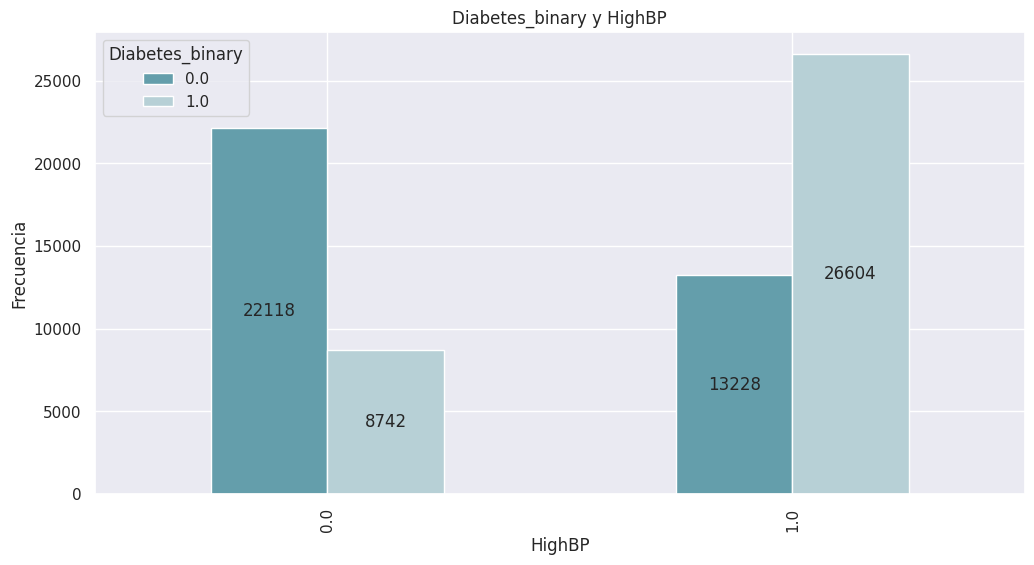

In [21]:
grouped_bar_plot(data['HighBP'])

In [22]:
import scipy.stats as stats
#Análisis de chi cuadrado para ver si hay una asociación significativa entre ambas variables
crosstab = pd.crosstab(data['Diabetes_binary'], data['HighBP'])
crosstab
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=10287.972984997781, pvalue=0.0, dof=1, expected_freq=array([[15430., 19916.],
       [15430., 19916.]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs HighChol

Diabetes_binary    0.0    1.0    All
HighChol                            
0.0              21869  11660  33529
1.0              13477  23686  37163
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


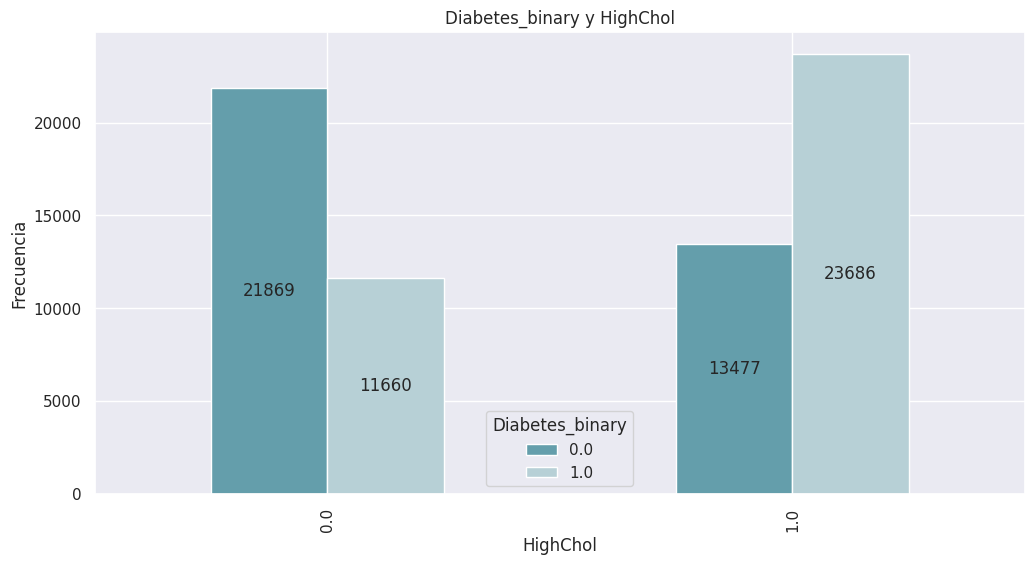

In [23]:
grouped_bar_plot(data['HighChol'])

In [24]:
crosstab1 = pd.crosstab(data['Diabetes_binary'], data['HighChol'])
crosstab1
stats.chi2_contingency(crosstab1)

Chi2ContingencyResult(statistic=5911.8066998822505, pvalue=0.0, dof=1, expected_freq=array([[16764.5, 18581.5],
       [16764.5, 18581.5]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs CholCheck

Diabetes_binary    0.0    1.0    All
CholCheck                           
0.0               1508    241   1749
1.0              33838  35105  68943
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


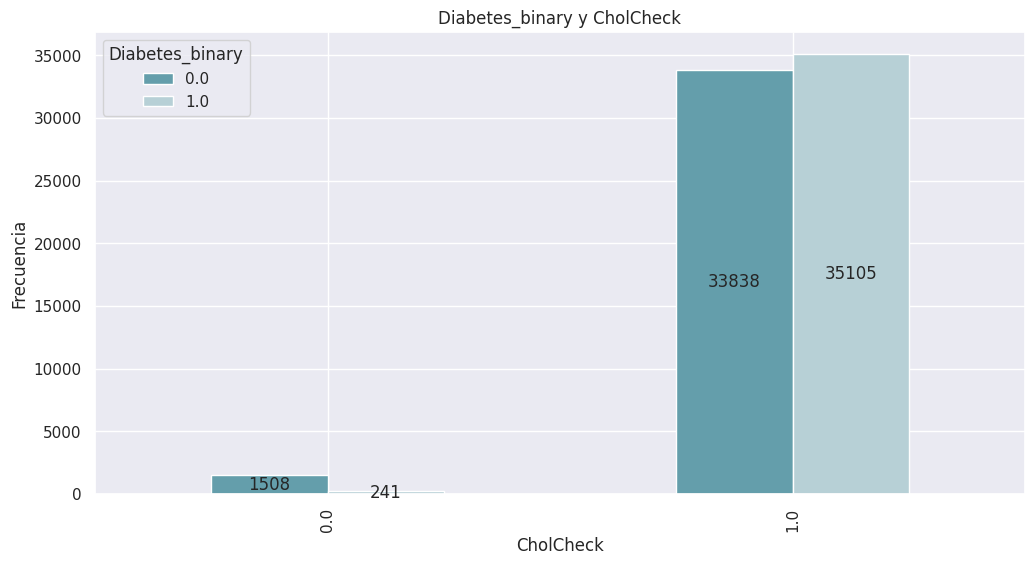

In [25]:
grouped_bar_plot(data['CholCheck'])

In [26]:
crosstab2 = pd.crosstab(data['Diabetes_binary'], data['CholCheck'])
crosstab2
stats.chi2_contingency(crosstab2)

Chi2ContingencyResult(statistic=939.6317718798653, pvalue=2.3798712773419562e-206, dof=1, expected_freq=array([[  874.5, 34471.5],
       [  874.5, 34471.5]]))

&#10148; Se observa quna relación significativa entre ambas variables.

Diabetes_binary vs Smoker

Diabetes_binary    0.0    1.0    All
Smoker                              
0.0              20065  17029  37094
1.0              15281  18317  33598
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


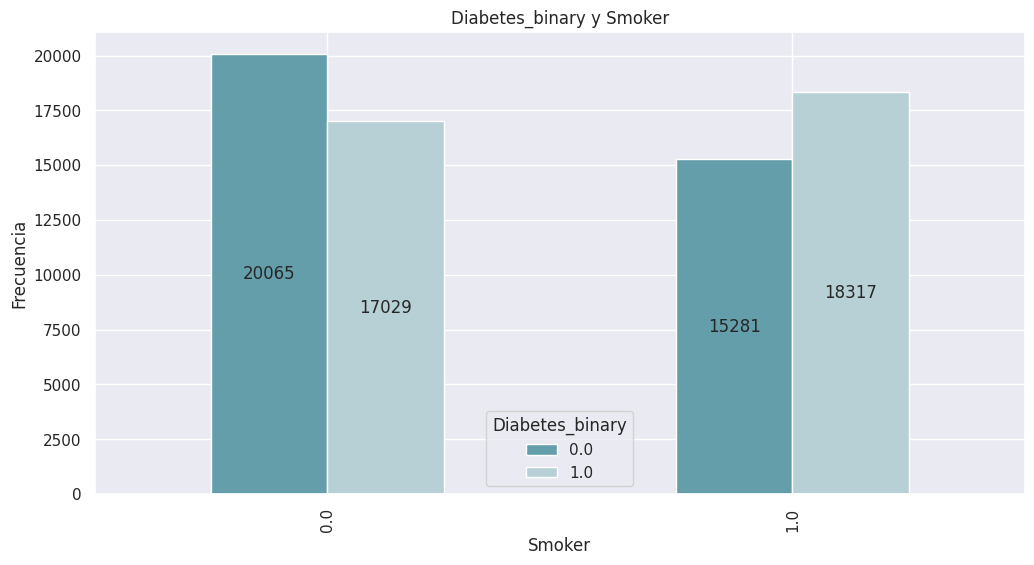

In [27]:
grouped_bar_plot(data['Smoker'])

In [28]:
crosstab3 = pd.crosstab(data['Diabetes_binary'], data['Smoker'])
crosstab3
stats.chi2_contingency(crosstab3)

Chi2ContingencyResult(statistic=522.4810772937883, pvalue=1.2211053080400827e-115, dof=1, expected_freq=array([[18547., 16799.],
       [18547., 16799.]]))

&#10148; Se observa una relación significativa entre ambas variables.


Diabetes_binary vs Stroke

Diabetes_binary    0.0    1.0    All
Stroke                              
0.0              34219  32078  66297
1.0               1127   3268   4395
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


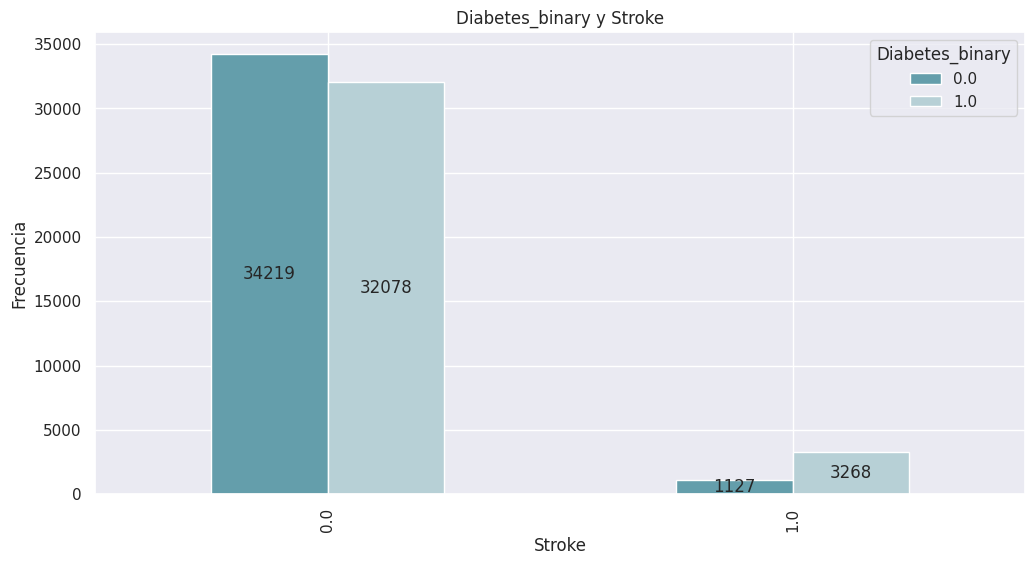

In [29]:
grouped_bar_plot(data['Stroke'])

In [30]:
crosstab4 = pd.crosstab(data['Diabetes_binary'], data['Stroke'])
crosstab4
stats.chi2_contingency(crosstab4)

Chi2ContingencyResult(statistic=1111.0793074560897, pvalue=1.290837098922016e-243, dof=1, expected_freq=array([[33148.5,  2197.5],
       [33148.5,  2197.5]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs HeartDiseaseorAttack

Diabetes_binary         0.0    1.0    All
HeartDiseaseorAttack                     
0.0                   32775  27468  60243
1.0                    2571   7878  10449
All                   35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


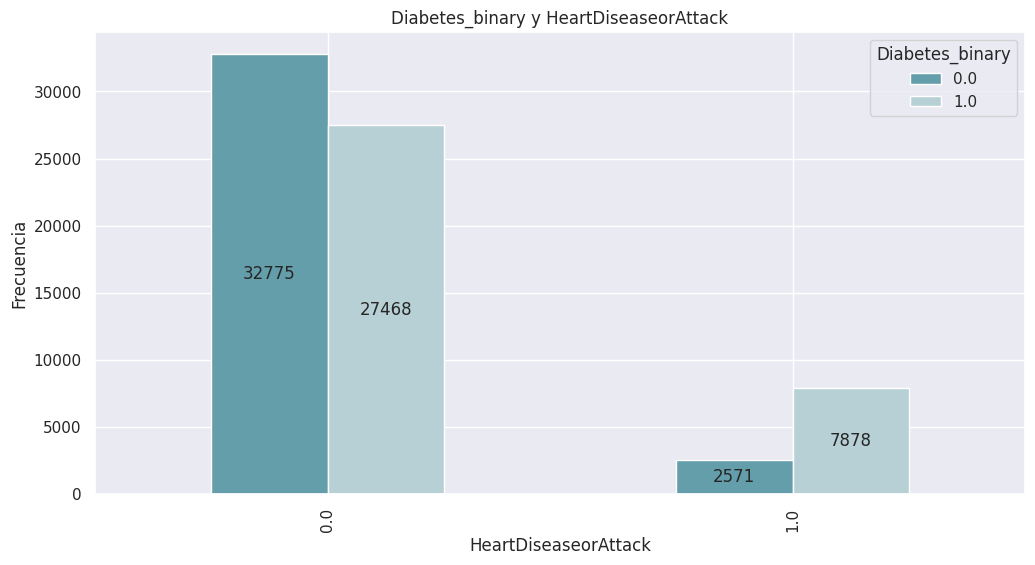

In [31]:
grouped_bar_plot(data['HeartDiseaseorAttack'])

In [32]:
crosstab5 = pd.crosstab(data['Diabetes_binary'], data['HeartDiseaseorAttack'])
crosstab5
stats.chi2_contingency(crosstab5)

Chi2ContingencyResult(statistic=3161.7202445322782, pvalue=0.0, dof=1, expected_freq=array([[30121.5,  5224.5],
       [30121.5,  5224.5]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs PhysActivity

Diabetes_binary    0.0    1.0    All
PhysActivity                        
0.0               7934  13059  20993
1.0              27412  22287  49699
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


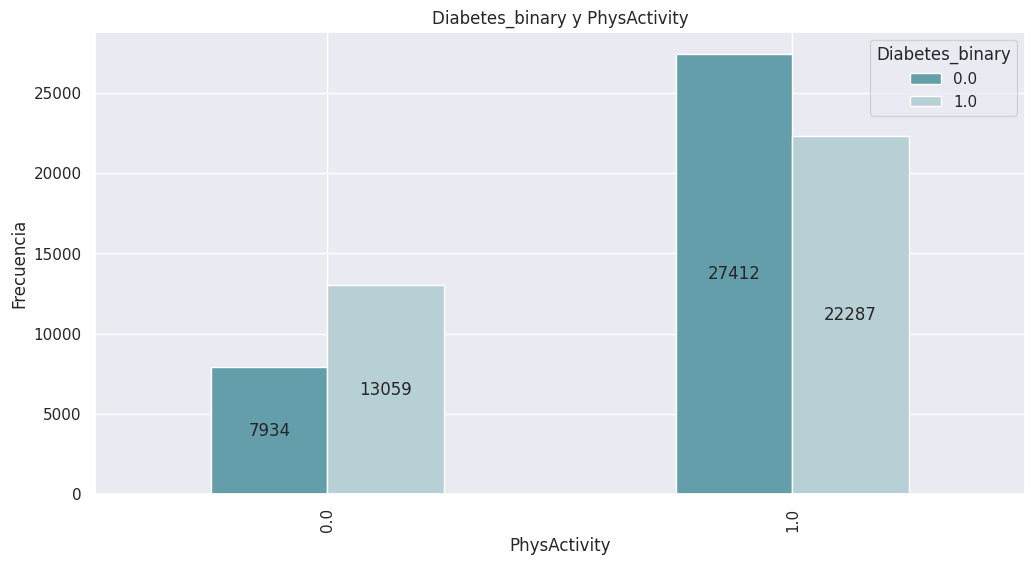

In [33]:
grouped_bar_plot(data['PhysActivity'])

In [34]:
crosstab6 = pd.crosstab(data['Diabetes_binary'], data['PhysActivity'])
crosstab6
stats.chi2_contingency(crosstab6)

Chi2ContingencyResult(statistic=1778.9607035956992, pvalue=0.0, dof=1, expected_freq=array([[10496.5, 24849.5],
       [10496.5, 24849.5]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs Fruits

Diabetes_binary    0.0    1.0    All
Fruits                              
0.0              12790  14653  27443
1.0              22556  20693  43249
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


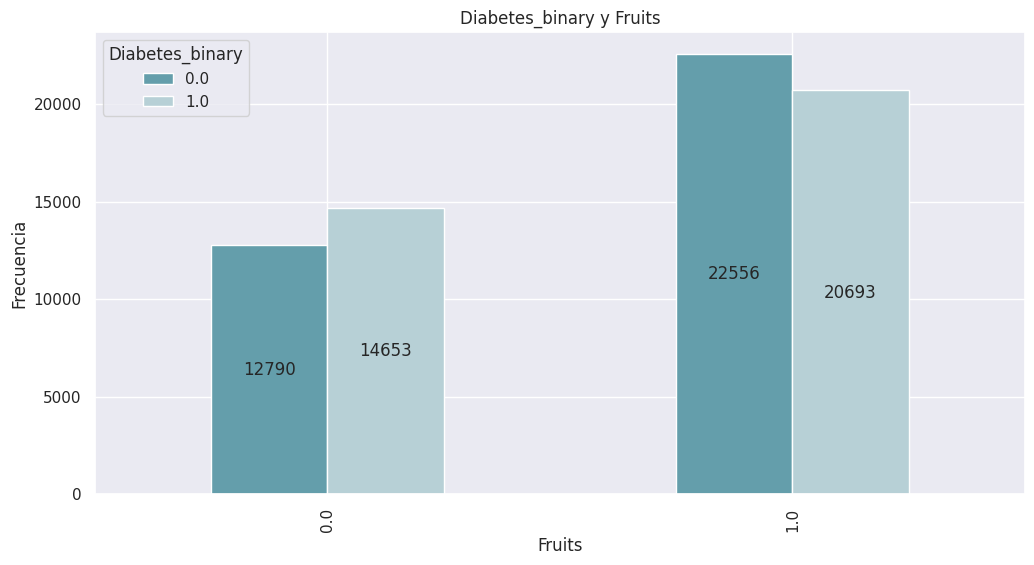

In [35]:
grouped_bar_plot(data['Fruits'])

In [36]:
crosstab7 = pd.crosstab(data['Diabetes_binary'], data['Fruits'])
crosstab7
stats.chi2_contingency(crosstab7)

Chi2ContingencyResult(statistic=206.50090830615105, pvalue=7.967064756507964e-47, dof=1, expected_freq=array([[13721.5, 21624.5],
       [13721.5, 21624.5]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs Veggies

Diabetes_binary    0.0    1.0    All
Veggies                             
0.0               6322   8610  14932
1.0              29024  26736  55760
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


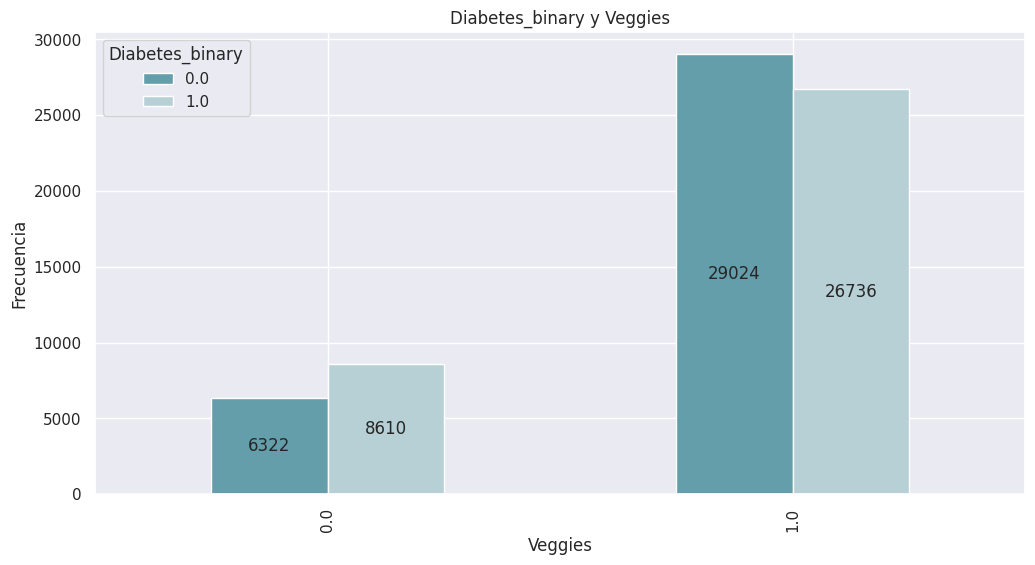

In [37]:
grouped_bar_plot(data['Veggies'])

In [38]:
crosstab8 = pd.crosstab(data['Diabetes_binary'], data['Veggies'])
crosstab8
stats.chi2_contingency(crosstab8)

Chi2ContingencyResult(statistic=444.0806516898606, pvalue=1.4007103685991128e-98, dof=1, expected_freq=array([[ 7466., 27880.],
       [ 7466., 27880.]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs HvyAlcoholConsump

Diabetes_binary      0.0    1.0    All
HvyAlcoholConsump                     
0.0                33158  34514  67672
1.0                 2188    832   3020
All                35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


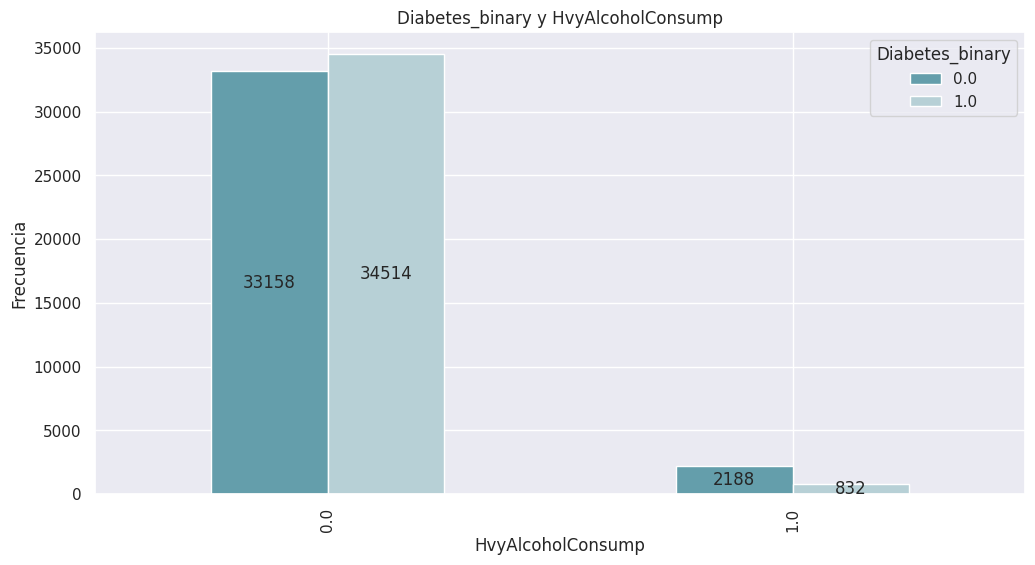

In [39]:
grouped_bar_plot(data['HvyAlcoholConsump'])

In [40]:
crosstab9 = pd.crosstab(data['Diabetes_binary'], data['HvyAlcoholConsump'])
crosstab9
stats.chi2_contingency(crosstab9)

Chi2ContingencyResult(statistic=635.0865339749427, pvalue=3.9133962745676324e-140, dof=1, expected_freq=array([[33836.,  1510.],
       [33836.,  1510.]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs AnyHealthcare

Diabetes_binary    0.0    1.0    All
AnyHealthcare                       
0.0               1762   1422   3184
1.0              33584  33924  67508
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


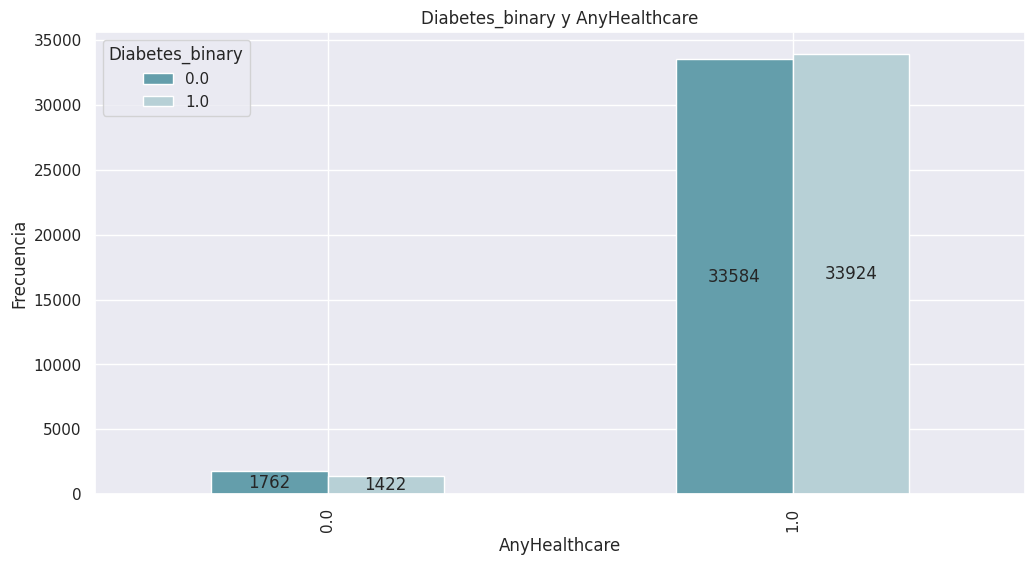

In [41]:
grouped_bar_plot(data['AnyHealthcare'])

In [42]:
crosstab10 = pd.crosstab(data['Diabetes_binary'], data['AnyHealthcare'])
crosstab10
stats.chi2_contingency(crosstab10)

Chi2ContingencyResult(statistic=37.79561046998934, pvalue=7.855833890083924e-10, dof=1, expected_freq=array([[ 1592., 33754.],
       [ 1592., 33754.]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs NoDocbcCost

Diabetes_binary    0.0    1.0    All
NoDocbcCost                         
0.0              32449  31604  64053
1.0               2897   3742   6639
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


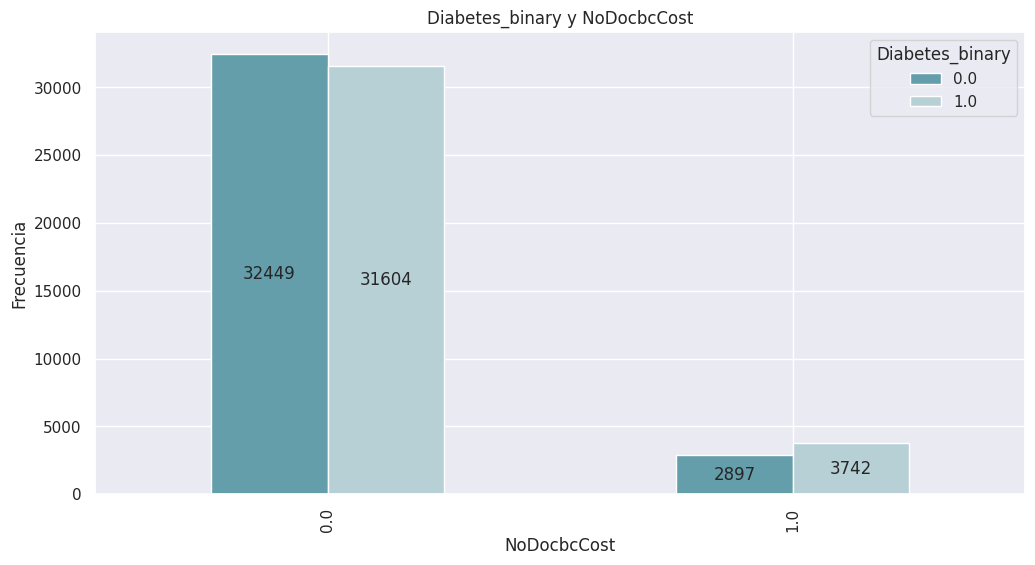

In [43]:
grouped_bar_plot(data['NoDocbcCost'])

In [44]:
crosstab11 = pd.crosstab(data['Diabetes_binary'], data['NoDocbcCost'])
crosstab11
stats.chi2_contingency(crosstab11)

Chi2ContingencyResult(statistic=118.4167174482265, pvalue=1.4053255735064045e-27, dof=1, expected_freq=array([[32026.5,  3319.5],
       [32026.5,  3319.5]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs GenHlth

Diabetes_binary    0.0    1.0    All
GenHlth                             
1.0               7142   1140   8282
2.0              13491   6381  19872
3.0               9970  13457  23427
4.0               3513   9790  13303
5.0               1230   4578   5808
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


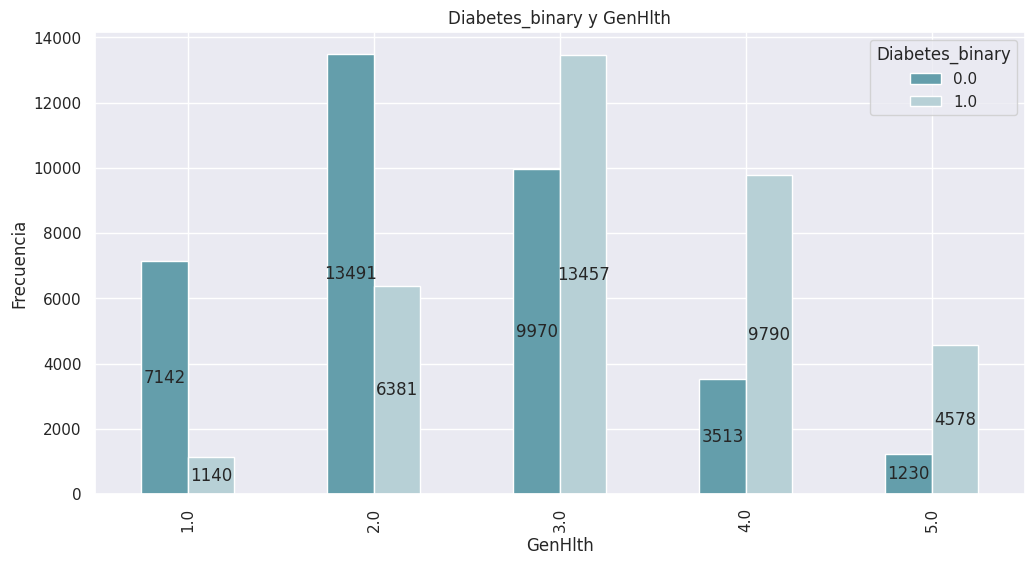

In [45]:
grouped_bar_plot(data['GenHlth'])

In [46]:
crosstab12 = pd.crosstab(data['Diabetes_binary'], data['GenHlth'])
crosstab12
stats.chi2_contingency(crosstab12)

Chi2ContingencyResult(statistic=12304.318979903528, pvalue=0.0, dof=4, expected_freq=array([[ 4141. ,  9936. , 11713.5,  6651.5,  2904. ],
       [ 4141. ,  9936. , 11713.5,  6651.5,  2904. ]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs DiffWalk

Diabetes_binary    0.0    1.0    All
DiffWalk                            
0.0              30601  22225  52826
1.0               4745  13121  17866
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


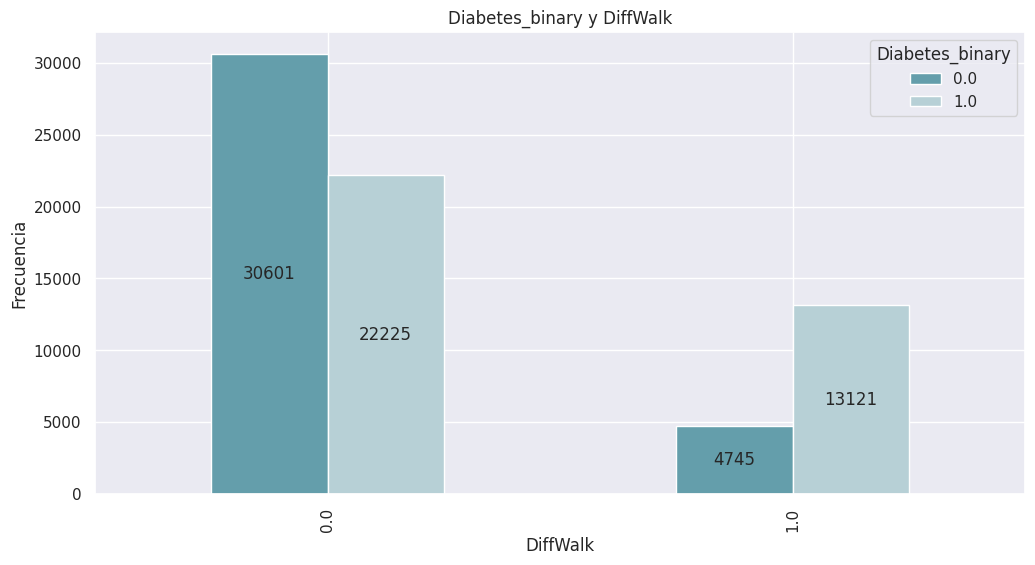

In [47]:
grouped_bar_plot(data['DiffWalk'])

In [48]:
crosstab13 = pd.crosstab(data['Diabetes_binary'], data['DiffWalk'])
crosstab13
stats.chi2_contingency(crosstab13)

Chi2ContingencyResult(statistic=5253.694843161374, pvalue=0.0, dof=1, expected_freq=array([[26413.,  8933.],
       [26413.,  8933.]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs Sex

Diabetes_binary    0.0    1.0    All
Sex                                 
0.0              19975  18411  38386
1.0              15371  16935  32306
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


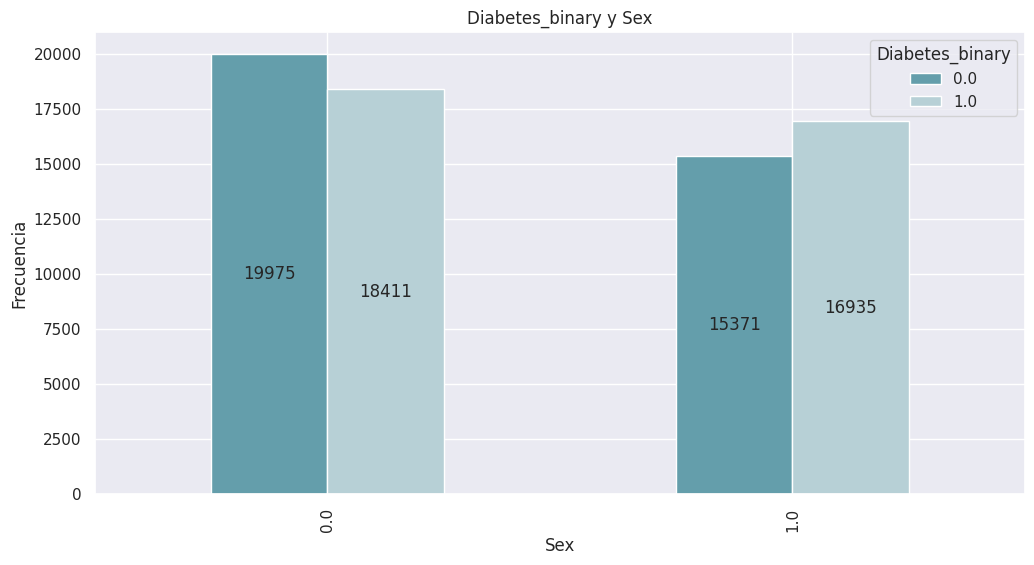

In [49]:
grouped_bar_plot(data['Sex'])

In [50]:
crosstab14 = pd.crosstab(data['Diabetes_binary'], data['Sex'])
crosstab14
stats.chi2_contingency(crosstab14)

Chi2ContingencyResult(statistic=139.26185542886512, pvalue=3.860395909809483e-32, dof=1, expected_freq=array([[19193., 16153.],
       [19193., 16153.]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs Age

Diabetes_binary    0.0    1.0    All
Age                                 
1.0                901     78    979
2.0               1256    140   1396
3.0               1735    314   2049
4.0               2167    626   2793
5.0               2469   1051   3520
6.0               2906   1742   4648
7.0               3784   3088   6872
8.0               4340   4263   8603
9.0               4379   5733  10112
10.0              4298   6558  10856
11.0              2903   5141   8044
12.0              1991   3403   5394
13.0              2217   3209   5426
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


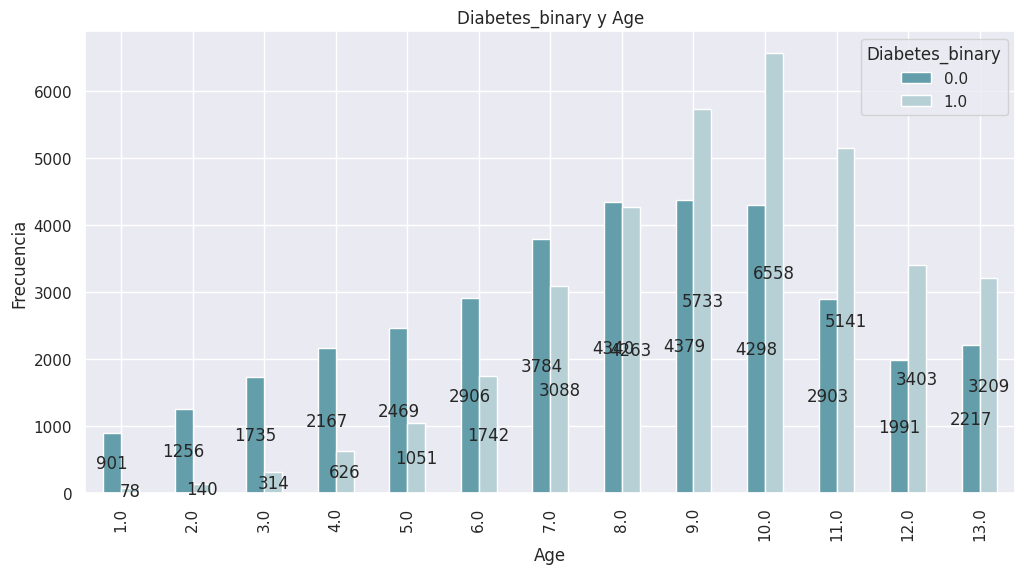

In [51]:
grouped_bar_plot(data['Age'])

In [52]:
crosstab15 = pd.crosstab(data['Diabetes_binary'], data['Age'])
crosstab15
stats.chi2_contingency(crosstab15)

Chi2ContingencyResult(statistic=6179.057132257292, pvalue=0.0, dof=12, expected_freq=array([[ 489.5,  698. , 1024.5, 1396.5, 1760. , 2324. , 3436. , 4301.5,
        5056. , 5428. , 4022. , 2697. , 2713. ],
       [ 489.5,  698. , 1024.5, 1396.5, 1760. , 2324. , 3436. , 4301.5,
        5056. , 5428. , 4022. , 2697. , 2713. ]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs Education

Diabetes_binary    0.0    1.0    All
Education                           
1.0                 28     47     75
2.0                464   1183   1647
3.0               1151   2296   3447
4.0               8407  11066  19473
5.0               9676  10354  20030
6.0              15620  10400  26020
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


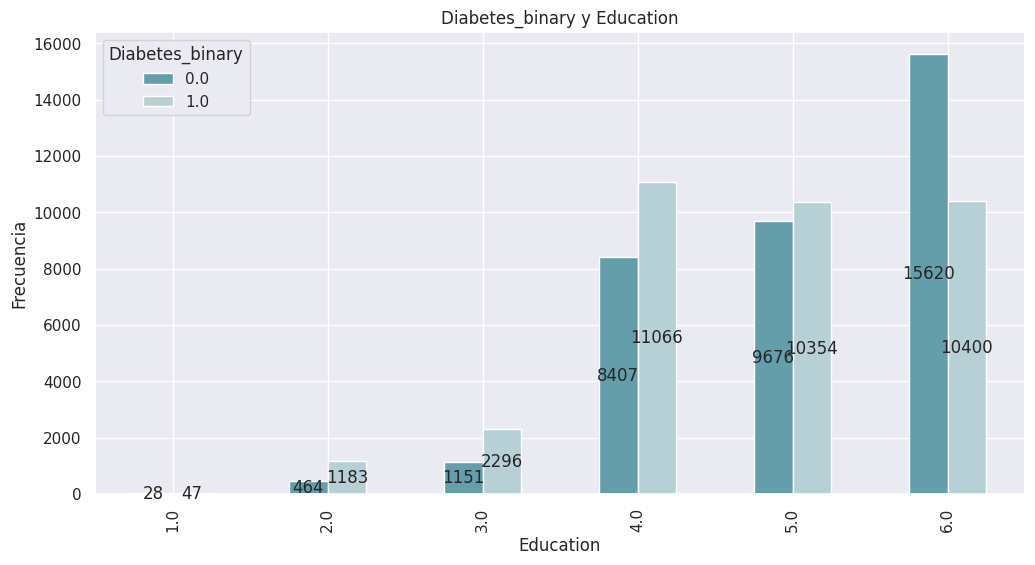

In [53]:
grouped_bar_plot(data['Education'])

In [54]:
crosstab16 = pd.crosstab(data['Diabetes_binary'], data['Education'])
crosstab16
stats.chi2_contingency(crosstab16)

Chi2ContingencyResult(statistic=2132.272551584347, pvalue=0.0, dof=5, expected_freq=array([[   37.5,   823.5,  1723.5,  9736.5, 10015. , 13010. ],
       [   37.5,   823.5,  1723.5,  9736.5, 10015. , 13010. ]]))

&#10148; Se observa una relación significativa entre ambas variables.

Diabetes_binary vs Income

Diabetes_binary    0.0    1.0    All
Income                              
1.0               1228   2383   3611
2.0               1412   3086   4498
3.0               1989   3568   5557
4.0               2604   4054   6658
5.0               3506   4504   8010
6.0               4996   5291  10287
7.0               6160   5265  11425
8.0              13451   7195  20646
All              35346  35346  70692
------------------------------------------------------------------------------------------------------------------------


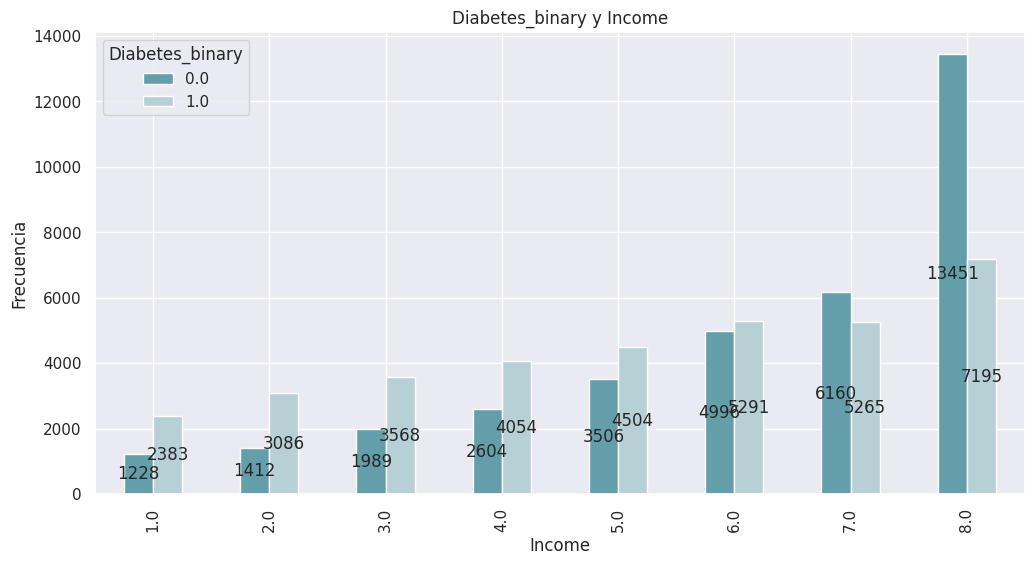

In [55]:
grouped_bar_plot(data['Income'])

In [56]:
crosstab17 = pd.crosstab(data['Diabetes_binary'], data['Income'])
crosstab17
stats.chi2_contingency(crosstab17)

Chi2ContingencyResult(statistic=3855.454575562344, pvalue=0.0, dof=7, expected_freq=array([[ 1805.5,  2249. ,  2778.5,  3329. ,  4005. ,  5143.5,  5712.5,
        10323. ],
       [ 1805.5,  2249. ,  2778.5,  3329. ,  4005. ,  5143.5,  5712.5,
        10323. ]]))

&#10148; Se observa una relación significativa entre ambas variables.

#Preprocesamiento de datos

Como señalado en el apartado "Análisis Univariado", se deben tratar los outliers para la variable "BMI". Primero, calcularemos la cantidad de observaciones con "BMI" mayor a 54.

In [57]:
outliers = data[data['BMI'] > 54]
print("Observaciones con BMI mayor a 54: ", len(outliers))

Observaciones con BMI mayor a 54:  524


Siendo el porcentaje de outliers:

In [58]:
obs = len(data)
out = len(outliers)
pct_out = (out / obs) * 100
print(f"Porcentaje de observaciones outliers: {pct_out:.2f}%")

Porcentaje de observaciones outliers: 0.74%


Por lo cual procedemos a eliminarnos ya que no llegan al 1%.

In [59]:
data = data[data['BMI'] <= 54]
print("Nuevo tamaño del df después de eliminar outliers:", data.shape)

Nuevo tamaño del df después de eliminar outliers: (70168, 22)


Quedando como nueva distribución de clases:

In [60]:
print(data['Diabetes_binary'].value_counts())


0.0    35208
1.0    34960
Name: Diabetes_binary, dtype: int64


Se observa un leve desbalanceo entre las clases por lo que vamos a entrenar nuestros algoritmos con esta distribución y evaluaremos la capacidad de generalizar de los modelos.

#Selección de variables

Procedemos a realizar la división de datos

##División de datos train (80%) y test (20%)

In [61]:
var_cat = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

var_num = ['MentHlth', 'PhysHlth', 'BMI']
target = ['Diabetes_binary']

X = data[var_num + var_cat]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=seed)

#Modelización y Evaluación de modelos

Trabajaremos con cinco algoritmos:  Logistic Regression, Linear SVC, Decision Tree, Random Forest y XGBoost ya que nos enfrentamos a un problema de clasificación binaria.
Para los cuatro primeros usaremos RFECV, una técnica de selección de características que elimina de manera iterativa aquellas que no son relevantes.

In [62]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
    ("Logistic", LogisticRegression(random_state=seed)),
    ("LinearSVC", LinearSVC(random_state=seed)),
    ("DecisionTree", DecisionTreeClassifier(random_state=seed)),
    ("RandomForest", RandomForestClassifier(random_state=seed))
]

# Creamos un DataFrame para almacenar los rankings de los features
feature_rankings_df = pd.DataFrame(index=X_train.columns)

# Lista para almacenar modelos finales
modelos_finales = []

# Diccionario de features seleccionados
selected_features_dict = {}

# Usamos RFECV para seleccionar automáticamente el número óptimo de features
for model_name, model in models:
    rfecv_model = RFECV(estimator=model, step=1, cv=5)
    rfecv_model.fit(X_train, y_train)
    feature_ranking = rfecv_model.ranking_

# Guardamos los rankings en el DataFrame
    feature_rankings_df[model_name] = feature_ranking

    selected_features = X_train.columns[feature_ranking == 1].tolist()
    selected_features_dict[model_name] = selected_features

    print(f"{model_name} - Número óptimo de variables: {rfecv_model.n_features_}")
    print(f"{model_name} - Variables seleccionadas:")
    print(selected_features)
    print("-" * 40)

    modelo_entrenado = model.fit(X_train[selected_features], y_train)
    modelos_finales.append((model_name, modelo_entrenado))
    print("-" * 40)

# Imprimimos los rankings de todas las características
print("Feature Rankings:")
print(feature_rankings_df)

# Probamos los modelos con los features seleccionados en el conjunto de datos test
for model_name, modelo_entrenado in modelos_finales:
    selected_features = selected_features_dict[model_name]
    accuracy = modelo_entrenado.score(X_test[selected_features], y_test)
    print(f"{model_name} - Accuracy test: {accuracy}")


Logistic - Número óptimo de variables: 16
Logistic - Variables seleccionadas:
['BMI', 'HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
----------------------------------------
----------------------------------------
LinearSVC - Número óptimo de variables: 12
LinearSVC - Variables seleccionadas:
['HighBP', 'HighChol', 'CholCheck', 'HeartDiseaseorAttack', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income']
----------------------------------------
----------------------------------------
DecisionTree - Número óptimo de variables: 3
DecisionTree - Variables seleccionadas:
['BMI', 'HighBP', 'GenHlth']
----------------------------------------
----------------------------------------
RandomForest - Número óptimo de variables: 21
RandomForest - Variables seleccionadas:
['MentHlth', 'PhysHlth', 'BMI', 'HighB

#Búqueda de mejores hiperparámetros

Para manejar el desbalanceo de clases, buscaremos el peso de clase óptimo para nuestros modelos ajustando el hiperparámetro class_weight:

In [63]:
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import f1_score, confusion_matrix, classification_report
models = [
    {
        'name': 'Logistic',
        'model': LogisticRegression(random_state=seed),
        'param_grid': {
            'solver': ['newton-cg', 'liblinear', 'lbfgs', 'newton-cholesky', 'sag', 'saga'],
            'penalty': ['l1', 'l2', 'elasticnet', None],
            'C': [100, 10, 1.0, 0.1, 0.01],
            'class_weight' : [None, 'balanced'],
            'dual': [True, False]
        }
    },

     {
        'name': 'LinearSVC',
        'model': LinearSVC(random_state=seed),
        'param_grid': {
            'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'penalty': ['l1','l2'],
            'loss': ['hinge', 'squared_hinge'],
            'dual': [True, False],
            'class_weight': [None, 'balanced']
        }
    },

    {
        'name': 'DecisionTree',
        'model': DecisionTreeClassifier(random_state=seed),
        'param_grid': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': [None, 'balanced']
        }
    },

    {
        'name': 'RandomForest',
        'model': RandomForestClassifier(random_state=seed),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20],
            'min_samples_split': [2, 4],
            'min_samples_leaf': [2, 5],
            'class_weight': [None, 'balanced']
        }
    },
]

for model_info in models:
    model_name = model_info['name']
    model = model_info['model']
    param_grid = model_info['param_grid']

    # Usamos el diccionario para obtener las características seleccionadas por RFECV
    selected_features = selected_features_dict[model_name]

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train[selected_features], y_train)

    print(f"Mejores hiperparámetros para {model_name}: {grid_search.best_params_}")
    print(f"Validación cruzada para {model_name}: {grid_search.best_score_}")

    best_model = grid_search.best_estimator_
    best_model.fit(X_train[selected_features], y_train)

    # Guardamos cada modelo en un archivo pickle
    filename = f"model_{model_name}.pkl"
    with open(filename, 'wb') as file:
        pickle.dump((best_model, selected_features), file)

    # Predicciones en el conjunto de prueba
    y_pred = best_model.predict(X_test[selected_features])

    # Imprimimos la matriz de confusión y el informe de clasificación
    print(f"Matriz de confusión para {model_name}:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Informe de clasificación para {model_name}:\n{classification_report(y_test, y_pred)}")
    print("-" * 40)

Mejores hiperparámetros para Logistic: {'C': 0.1, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l2', 'solver': 'liblinear'}
Validación cruzada para Logistic: 0.7488687198823063
Matriz de confusión para Logistic:
[[5144 1901]
 [1647 5342]]
Informe de clasificación para Logistic:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7045
         1.0       0.74      0.76      0.75      6989

    accuracy                           0.75     14034
   macro avg       0.75      0.75      0.75     14034
weighted avg       0.75      0.75      0.75     14034

----------------------------------------
Mejores hiperparámetros para LinearSVC: {'C': 0.1, 'class_weight': None, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}
Validación cruzada para LinearSVC: 0.7349734011301144
Matriz de confusión para LinearSVC:
[[5029 2016]
 [1737 5252]]
Informe de clasificación para LinearSVC:
              precision    recall  f1-score   support

 

#XGBOOST

En el caso de XGBOOST, no podemos aplicar RFECV para seleccionar los mejores features ya que tenemos variables categoricas. Por ello crearemos variables dummies para los datos de entrenamiento y prueba:

In [64]:
from sklearn.preprocessing import LabelEncoder
X_train_encoded = pd.get_dummies(X_train)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

X_test_encoded = pd.get_dummies(X_test)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_encoded = X_test_encoded[X_train_encoded.columns]
y_test_encoded = label_encoder.fit_transform(y_test)

Ahora, usaremos SelectFromModel, un meta-transformador para seleccionar fetaures basados en los pesos de importancia.

In [65]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

xgb_model = XGBClassifier(enable_categorical=True, random_state=seed)
xgb_model.fit(X_train_encoded, y_train_encoded)
sfm_xgb = SelectFromModel(xgb_model, prefit=True)
X_train_selected_xgb = sfm_xgb.transform(X_train_encoded)
selected_features_xgb = X_train_encoded.columns[sfm_xgb.get_support()].tolist()

print("XGBoost - Número óptimo de variables:", len(selected_features_xgb))
print("XGBoost - Variables seleccionadas:")
print(selected_features_xgb)
print("-" * 40)

modelo_entrenado2 = xgb_model.fit(X_train_encoded[selected_features_xgb], y_train_encoded)

accuracy = modelo_entrenado2.score(X_test_encoded[selected_features_xgb], y_test_encoded)
print("XGBoost - Accuracy test:", accuracy)

XGBoost - Número óptimo de variables: 12
XGBoost - Variables seleccionadas:
['HighBP_0.0', 'HighChol_0.0', 'CholCheck_0.0', 'HeartDiseaseorAttack_0.0', 'GenHlth_1.0', 'GenHlth_2.0', 'DiffWalk_0.0', 'Age_1.0', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Income_8.0']
----------------------------------------
XGBoost - Accuracy test: 0.7283026934587431


Buscamos los mejores hiperparametros para el modelo que contiene los mejores features

In [66]:
xgb_model = XGBClassifier(enable_categorical=True, random_state=seed)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 1.2, 1.3, 1.4, 1.5, 2]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_encoded[selected_features_xgb], y_train_encoded)

print("Mejores hiperparámetros para XGBoost:", grid_search.best_params_)
print("Validación cruzada para XGBoost:", grid_search.best_score_)

best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_encoded[selected_features_xgb], y_train_encoded)
y_pred_encoded = best_xgb_model.predict(X_test_encoded[selected_features_xgb])

print("Matriz de confusión para XGBoost:", confusion_matrix(y_test_encoded, y_pred_encoded))
print("Informe de clasificación para XGBoost:", classification_report(y_test_encoded, y_pred_encoded))

Mejores hiperparámetros para XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}
Validación cruzada para XGBoost: 0.7331563243790569
Matriz de confusión para XGBoost: [[4814 2231]
 [1576 5413]]
Informe de clasificación para XGBoost:               precision    recall  f1-score   support

           0       0.75      0.68      0.72      7045
           1       0.71      0.77      0.74      6989

    accuracy                           0.73     14034
   macro avg       0.73      0.73      0.73     14034
weighted avg       0.73      0.73      0.73     14034



#Selección del modelo

Seleccionamos a "Logistic Regression" como el mejor modelo a pesar de tener 4 características adicionales en comparación con "LinearSVC". Este modelo destaca por ser simple, fácil de interpretar y con una mejor velocidad de entrenamiento en comparación con los otros modelos presentados.

Además, logró un accuracy del 75%, y el informe de clasificación muestra un rendimiento equilibrado en términos de precision, recall y f1-score.

Si bien podría esperarse un accuracy mayor para un modelo de predicción de diabetes/prediabetes, es importante tener en cuenta que el conjunto de datos utilizado para el análisis no incluye variables relevantes como "glucosa basal", "insulina", "hemoglobina glicosilada", "grosor de la piel", etc. La falta de estas variables importantes puede limitar la capacidad del modelo para lograr una precisión más alta.

Ahora procederemos a usar el archivo pickle para el modelo seleccionado, esto con la finalidad de usarlo para crear un servicio usando FastAPI.

In [67]:
import pickle
import pandas as pd

#Cargamos el modelo del archivo pickle
with open('model_Logistic.pkl', 'rb') as file:
    model, selected_features = pickle.load(file)

# Dfs de prueba
datos_pred = pd.DataFrame({
    'BMI': [26.0],
    'HighBP': ['1'],
    'HighChol': ['0'],
    'CholCheck': ['1'],
    'Stroke': ['0'],
    'HeartDiseaseorAttack': ['0'],
    'PhysActivity':['0'],
    'Veggies': ['1'],
    'HvyAlcoholConsump': ['0'],
    'AnyHealthcare': ['1'],
    'GenHlth': ['3'],
    'DiffWalk': ['0'],
    'Sex': ['1'],
    'Age': ['4'],
    'Education': ['6'],
    'Income': ['6']
})

datos_pred1 = pd.DataFrame({
    'BMI': [30.0],
    'HighBP': ['1'],
    'HighChol': ['1'],
    'CholCheck': ['1'],
    'Stroke': ['0'],
    'HeartDiseaseorAttack': ['1'],
    'PhysActivity': ['1'],
    'Veggies': ['1'],
    'HvyAlcoholConsump': ['0'],
    'AnyHealthcare': ['1'],
    'GenHlth': ['5'],
    'DiffWalk': ['1'],
    'Sex': ['0'],
    'Age': ['9'],
    'Education': ['5'],
    'Income': ['7']
})




In [68]:
prediccion = model.predict(datos_pred)
print("Predicción:")
print(prediccion)

Predicción:
[0.]


In [69]:
prediccion1 = model.predict(datos_pred1)
print("Predicción:")
print(prediccion1)

Predicción:
[1.]
